In [2]:
#from pyiron import Project
#from pyiron import ase_to_pyiron, pyiron_to_ase
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms
from scipy.optimize import curve_fit
#from pyiron import Project
#from pyiron import ase_to_pyiron, pyiron_to_ase
import shutil
import glob
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np 
import scipy.constants as const
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

In [3]:
#!pip install seaborn --upgrade

In [4]:
# Diffusion tensor, crystal to grain diffusion  
d_523 = [[2.661e-10,-2.442e-12,-3.188e-12],
         [-2.442e-12,2.125e-10,-3.188e-12],
         [-3.188e-12,-3.188e-12,3.660e-10]]

d_523_err = [[4.998e-14,1.295e-14,1.129e-14],
         [1.295e-14,2.316e-14,1.129e-14],
         [1.129e-14,1.129e-14,4.528e-14]]

d_573 = [[4.202e-10,7.027e-13,8.194e-13],
         [7.027e-13,3.368e-10,8.194e-13],
         [8.194e-13,8.194e-13,5.881e-10]]

d_573_err = [[5.815e-14,1.295e-14,1.129e-14],
         [1.295e-14,6.464e-14,1.129e-14],
         [1.129e-14,1.129e-14,6.173e-14]]

d_623 = [[5.297e-10,-1.102e-11,-2.956e-12],
         [-1.102e-11,4.413e-10,-2.956e-12],
         [-2.956e-12,-2.956e-12,7.575e-10]]

d_623_err = [[2.477e-12,7.789e-13,2.797e-12],
         [7.789e-13,1.666e-12,1.092e-12],
         [2.797e-12,1.092e-12,4.212e-12]]

d_673 = [[7.702e-10,7.031e-12,7.793e-12],
         [7.031e-12,5.961e-10,7.793e-12],
         [7.793e-12,7.793e-12,1.001e-09]]

d_673_err = [[1.172e-13,5.910e-14,4.444e-14],
         [5.910e-14,1.304e-13,4.444e-14],
         [4.444e-14,4.444e-14,2.065e-13]]

d_723 = [[9.499e-10,-5.382e-13,-1.242e-11],
         [-5.382e-13,7.161e-10,-1.242e-11],
         [-1.242e-11,-1.242e-11,1.210e-09]]

d_723_err = [[2.747e-13,3.335e-14,5.415e-14],
         [3.335e-14,2.096e-13,5.415e-14],
         [5.415e-14,5.415e-14,2.449e-13]]
         
d_773 = [[1.162e-09,-4.225e-12,-6.962e-12],
         [-4.225e-12,9.952e-10,-6.962e-12],
         [-6.962e-12,-6.962e-12,1.664e-09]]

d_773_err = [[3.119e-13,7.384e-14,1.015e-13],
         [7.384e-14,1.965e-13,1.015e-13],
         [1.015e-13,1.015e-13,3.164e-13]]

In [5]:
cry_x = [d_523[0][0],d_573[0][0],d_623[0][0],d_673[0][0],d_723[0][0],d_773[0][0]]
cry_y = [d_523[1][1],d_573[1][1],d_623[1][1],d_673[1][1],d_723[1][1],d_773[1][1]]
cry_z = [d_523[2][2],d_573[2][2],d_623[2][2],d_673[2][2],d_723[2][2],d_773[2][2]]
cry_tot = [(cry_x[0]+cry_y[0]+cry_z[0])/3,(cry_x[1]+cry_y[1]+cry_z[1])/3,(cry_x[2]+cry_y[2]+cry_z[2])/3,(cry_x[3]+cry_y[3]+cry_z[3])/3,(cry_x[4]+cry_y[4]+cry_z[4])/3,(cry_x[5]+cry_y[5]+cry_z[5])/3]

In [6]:
# sigma 5 (120)

# 1. rotated tensor in cartesian coordinates
x_5_1_b = [2.341404143648683e-10, 3.6614955032479483e-10, 4.837033626268429e-10, 6.520265315410277e-10, 8.007850734963461e-10, 1.0593042902821717e-09]
y_5_1_b = [2.444595856351314e-10, 3.9085044967520494e-10, 4.87296637373158e-10, 7.142734684589725e-10, 8.652149265036545e-10, 1.0978957097178287e-09]
z_5_1_b = [3.660000000000001e-10, 5.880999999999998e-10, 7.575000000000001e-10, 1.0009999999999997e-09, 1.209999999999999e-09, 1.6640000000000003e-09]
tot_5_1_b = [2.815333333333333e-10, 4.4836666666666647e-10, 5.76166666666667e-10, 7.891e-10, 9.586666666666665e-10, 1.2737333333333336e-09]

# 2. GB diffusion tensor after using cricuit model 

x_5_1_gb = [1.536575753088875e-11, 2.4090377639893502e-11, 5.901693988231628e-11, 1.1028077333270156e-10, 1.5288723247715875e-10, 2.05194179455543e-10]
y_5_1_gb = [9.206382070400132e-12, 1.5273791636885994e-11, 2.4925871482232625e-11, 4.088012027728599e-11, 5.2412816842622007e-11, 6.502614660390185e-11]
z_5_1_gb = [5.912907911192309e-11, 9.346865128846158e-11, 1.2905976379192304e-10, 1.8819057564615392e-10, 2.277192666192307e-10, 2.972578700038463e-10]
tot_5_1_gb = [2.7900406237737324e-11, 4.427760685508036e-11, 7.100085838549065e-11, 1.1311715641871383e-10, 1.443397719796705e-10, 1.891593986877637e-10]


In [7]:
# Sigma 5 (130)
x_5_2_b = [2.491482305210237e-10, 3.8950126426926053e-10, 5.084550594216963e-10, 7.007739343915249e-10, 8.662482715804714e-10, 1.1060077181711024e-09]
y_5_2_b = [2.2945176947897606e-10, 3.6749873573073923e-10, 4.6254494057830473e-10, 6.655260656084753e-10, 7.997517284195291e-10, 1.0511922818288978e-09]
z_5_2_b = [3.660000000000001e-10, 5.880999999999998e-10, 7.575000000000001e-10, 1.0009999999999997e-09, 1.209999999999999e-09, 1.6640000000000003e-09]
tot_5_2_b = [2.815333333333333e-10, 4.4836666666666647e-10, 5.76166666666667e-10, 7.891e-10, 9.586666666666665e-10, 1.2737333333333334e-09]

# 2. GB diffusion tensor after using cricuit model
x_5_2_gb = [7.733843922943633e-13, 1.253655415965217e-11, 2.427125826433156e-11, 5.1961894063452936e-11, 9.906806341672979e-11, 1.6986187776427388e-10]
y_5_2_gb = [8.868273095284722e-12, 1.5638758232924306e-11, 2.5129169759159347e-11, 3.844129291451133e-11, 5.840015874640864e-11, 8.08668139409091e-11]
z_5_2_gb = [1.0986732916937506e-10, 1.8154114056499997e-10, 2.3956181255437503e-10, 3.258061070121875e-10, 4.0813956471249976e-10, 5.485122334906251e-10]
tot_5_2_gb = [3.983632888565138e-11, 6.990548431919216e-11, 9.632074685928865e-11, 1.387364313300506e-10, 1.8853592895854605e-10, 2.6641364173193603e-10]

In [8]:
# Sigma 7 (11) twist IDP 02 
# 1. rotated tensor in cartesian coordinates
x_7_1_b = [2.660999999999998e-10, 4.202000000000001e-10, 5.297000000000006e-10, 7.702000000000001e-10, 9.499000000000002e-10, 1.162e-09]
y_7_1_b = [2.1249999999999986e-10, 3.3679999999999976e-10, 4.413000000000004e-10, 5.960999999999998e-10, 7.161000000000003e-10, 9.952000000000005e-10]
z_7_1_b = [3.660000000000001e-10, 5.880999999999998e-10, 7.575000000000001e-10, 1.0009999999999997e-09, 1.209999999999999e-09, 1.6640000000000003e-09]
tot_7_1_b = [2.8153333333333325e-10, 4.483666666666665e-10, 5.76166666666667e-10, 7.890999999999998e-10, 9.586666666666665e-10, 1.2737333333333336e-09]

# 2. GB diffusion tensor after using cricuit model
x_7_1_gb = [1.4543822330000006e-10, 3.3519445618999997e-10, 4.924168667499998e-10, 6.1916941658e-10, 8.7330010805e-10, 1.067097479e-09]
y_7_1_gb = [7.849813521350005e-11, 1.7289339942000007e-10, 2.7798045744499996e-10, 3.7348759692000005e-10, 5.133301581649999e-10, 6.308717896849999e-10]
z_7_1_gb = [5.4516301085723745e-11, 1.1821347687737873e-10, 2.1181303817967534e-10, 2.9356158732455236e-10, 4.223892706752241e-10, 4.4659829374993436e-10]
tot_7_1_gb = [9.281755319974129e-11, 2.0876711082912626e-10, 3.274034541248917e-10, 4.287395336081841e-10, 6.030065122967413e-10, 7.148558541449781e-10]

In [9]:
# Sigma 11, tilt IDP 06 
# 1. rotated tensor in cartesian coordinates
x_11_1_b = [2.4544807372959655e-10, 3.8360765693813006e-10, 5.025642051799674e-10, 6.883024436472518e-10, 8.498022977768286e-10, 1.0943909192105028e-09]
y_11_1_b = [2.331519262704031e-10, 3.733923430618698e-10, 4.684357948200335e-10, 6.779975563527482e-10, 8.161977022231718e-10, 1.0628090807894974e-09]
z_11_1_b = [3.660000000000001e-10, 5.880999999999998e-10, 7.575000000000001e-10, 1.0009999999999997e-09, 1.209999999999999e-09, 1.6640000000000003e-09]
tot_11_1_b = [2.8153333333333325e-10, 4.483666666666665e-10, 5.76166666666667e-10, 7.891e-10, 9.586666666666665e-10, 1.2737333333333334e-09]

# 2. GB diffusion tensor after using cricuit model
x_11_1_gb = [3.7908945936347993e-11, 5.7970340006104597e-11, 8.310061152515324e-11, 1.1057386867221313e-10, 1.2216400054187648e-10, 1.9863091999183095e-10]
y_11_1_gb = [1.4124941524232197e-10, 2.229280454112436e-10, 3.0629472932488224e-10, 4.3311629950339577e-10, 5.02021797790568e-10, 7.11465010311014e-10]
z_11_1_gb = [2.8109168553846073e-11, 3.178183190769237e-11, 1.3013993115384595e-10, 2.14237457323077e-10, 1.9827143826923146e-10, 3.659831814999997e-10]
tot_11_1_gb = [6.908917657750534e-11, 1.0422673910834687e-10, 1.731784240012938e-10, 2.526425418328953e-10, 2.7415241220055863e-10, 4.2535970393428154e-10]

In [10]:
# Sigma 13, 
# 1. rotated tensor in cartesian coordinates
x_13_1_b = [2.2216305639553824e-10, 3.486384567794003e-10, 4.6220195968216646e-10, 6.168622798838133e-10, 7.510683457568902e-10, 1.0228748494084539e-09]
y_13_1_b = [2.564369436044613e-10, 4.0836154322059955e-10, 5.087980403178345e-10, 7.494377201161868e-10, 9.149316542431102e-10, 1.134325150591546e-09]
z_13_1_b = [3.660000000000001e-10, 5.880999999999998e-10, 7.575000000000001e-10, 1.0009999999999997e-09, 1.209999999999999e-09, 1.6640000000000003e-09]
tot_13_1_b = [2.815333333333332e-10, 4.483666666666665e-10, 5.76166666666667e-10, 7.891e-10, 9.586666666666665e-10, 1.2737333333333334e-09]

# 2. GB diffusion tensor after using cricuit model
x_13_1_gb = [3.4736392690676126e-14, 1.1832697791017257e-11, 3.902975660143631e-11, 4.6353080335711686e-11, 1.1373547665212429e-10, 1.4273171039224093e-10]
y_13_1_gb = [1.823370398911261e-11, 3.780637698215677e-11, 5.259752993141027e-11, 7.018395279633645e-11, 1.0487961919266936e-10, 1.3308381312492213e-10]
z_13_1_gb = [1.828936653268182e-10, 2.9829326301272714e-10, 3.8857615240863644e-10, 5.131379415736362e-10, 6.324547370977267e-10, 8.638273535409092e-10]
tot_13_1_gb = [6.705403523620716e-11, 1.1597744592863372e-10, 1.6006781298049433e-10, 2.0989165823522812e-10, 2.836899443141735e-10, 3.798809590193574e-10]

In [11]:
# Excess volume, in A^3
ex_v_5_1 = [-1.4797206032727461]
ex_v_5_2 = [-1.4028590889723502]
ex_v_7_1 = [-1.40320612634761]
ex_v_11_1 = [-0.07847156056452788]
ex_v_13_1 = [-1.5229924011309934]

ex_vol = [ex_v_5_1, ex_v_5_2, ex_v_7_1, ex_v_11_1, ex_v_13_1]

In [12]:
# GB formation energy, in J/m^2
gb_5_1 = [4.1835032415236535]
gb_5_2 = [3.3444816141669547]
gb_7_1 = [0.7679073249356325]
gb_11_1 = [1.220358613044203]
gb_13_1 = [3.9113570795119355]

gb_energy = [gb_5_1, gb_5_2, gb_7_1, gb_11_1, gb_13_1]
print(gb_energy)

[[4.1835032415236535], [3.3444816141669547], [0.7679073249356325], [1.220358613044203], [3.9113570795119355]]


In [13]:
gb_x_d_623 = [x_5_1_gb[2], x_5_2_gb[2], x_7_1_gb[2], x_11_1_gb[2], x_13_1_gb[2]]
gb_y_d_623 = [y_5_1_gb[2], y_5_2_gb[2], y_7_1_gb[2], y_11_1_gb[2], y_13_1_gb[2]]
gb_z_d_623 = [z_5_1_gb[2], z_5_2_gb[2], z_7_1_gb[2], z_11_1_gb[2], z_13_1_gb[2]]
gb_tot_d_623 = [tot_5_1_gb[2], tot_5_2_gb[2], tot_7_1_gb[2], tot_11_1_gb[2], tot_13_1_gb[2]]

In [14]:
# Distinguish in parallel and perpendicular
# in sigma 5, amd 13 perpesicular is y, in 7 z is perpendicular, in 11 x is perpendicular
# 1
gb_perp_623 = [y_5_1_gb[2], y_5_2_gb[2], z_7_1_gb[2], x_11_1_gb[2], y_13_1_gb[2]]
gb_para_1_623 = [x_5_1_gb[2], x_5_2_gb[2], y_7_1_gb[2], y_11_1_gb[2], z_13_1_gb[2]]
gb_para_2_623 = [z_5_1_gb[2], z_5_2_gb[2], x_7_1_gb[2], z_11_1_gb[2], x_13_1_gb[2]]

# 2 
gb_perp_573 = [y_5_1_gb[1], y_5_2_gb[1], z_7_1_gb[1], x_11_1_gb[1], y_13_1_gb[1]]
gb_para_1_573 = [x_5_1_gb[1], x_5_2_gb[1], y_7_1_gb[1], y_11_1_gb[1], z_13_1_gb[1]]
gb_para_2_573 = [z_5_1_gb[1], z_5_2_gb[1], x_7_1_gb[1], z_11_1_gb[1], x_13_1_gb[1]]

# 3
gb_perp_523 = [y_5_1_gb[0], y_5_2_gb[0], z_7_1_gb[0], x_11_1_gb[0], y_13_1_gb[0]]
gb_para_1_523 = [x_5_1_gb[0], x_5_2_gb[0], y_7_1_gb[0], y_11_1_gb[0], z_13_1_gb[0]]
gb_para_2_523 = [z_5_1_gb[0], z_5_2_gb[0], x_7_1_gb[0], z_11_1_gb[0], x_13_1_gb[0]]

# 4
gb_perp_773 = [y_5_1_gb[3], y_5_2_gb[3], z_7_1_gb[3], x_11_1_gb[3], y_13_1_gb[3]]
gb_para_1_773 = [x_5_1_gb[3], x_5_2_gb[3], y_7_1_gb[3], y_11_1_gb[3], z_13_1_gb[3]]
gb_para_2_773 = [z_5_1_gb[3], z_5_2_gb[3], x_7_1_gb[3], z_11_1_gb[3], x_13_1_gb[3]]

# 5
gb_perp_723 = [y_5_1_gb[4], y_5_2_gb[4], z_7_1_gb[4], x_11_1_gb[4], y_13_1_gb[4]]
gb_para_1_723 = [x_5_1_gb[4], x_5_2_gb[4], y_7_1_gb[4], y_11_1_gb[4], z_13_1_gb[4]]
gb_para_2_723 = [z_5_1_gb[4], z_5_2_gb[4], x_7_1_gb[4], z_11_1_gb[4], x_13_1_gb[4]]

# 6
gb_perp_673 = [y_5_1_gb[5], y_5_2_gb[5], z_7_1_gb[5], x_11_1_gb[5], y_13_1_gb[5]]
gb_para_1_673 = [x_5_1_gb[5], x_5_2_gb[5], y_7_1_gb[5], y_11_1_gb[5], z_13_1_gb[5]]
gb_para_2_673 = [z_5_1_gb[5], z_5_2_gb[5], x_7_1_gb[5], z_11_1_gb[5], x_13_1_gb[5]]


In [15]:
print(gb_perp_523)
print(gb_perp_573)
print(gb_perp_623)
print(gb_perp_673)
print(gb_perp_723)
print(gb_perp_773)

[9.206382070400132e-12, 8.868273095284722e-12, 5.4516301085723745e-11, 3.7908945936347993e-11, 1.823370398911261e-11]
[1.5273791636885994e-11, 1.5638758232924306e-11, 1.1821347687737873e-10, 5.7970340006104597e-11, 3.780637698215677e-11]
[2.4925871482232625e-11, 2.5129169759159347e-11, 2.1181303817967534e-10, 8.310061152515324e-11, 5.259752993141027e-11]
[6.502614660390185e-11, 8.08668139409091e-11, 4.4659829374993436e-10, 1.9863091999183095e-10, 1.3308381312492213e-10]
[5.2412816842622007e-11, 5.840015874640864e-11, 4.223892706752241e-10, 1.2216400054187648e-10, 1.0487961919266936e-10]
[4.088012027728599e-11, 3.844129291451133e-11, 2.9356158732455236e-10, 1.1057386867221313e-10, 7.018395279633645e-11]


In [16]:
# plot excess volume vs diffusion tensor

import matplotlib.pyplot as plt
import numpy as np


In [17]:
print(gb_perp_523)

[9.206382070400132e-12, 8.868273095284722e-12, 5.4516301085723745e-11, 3.7908945936347993e-11, 1.823370398911261e-11]


NameError: name 'data_623_tt' is not defined

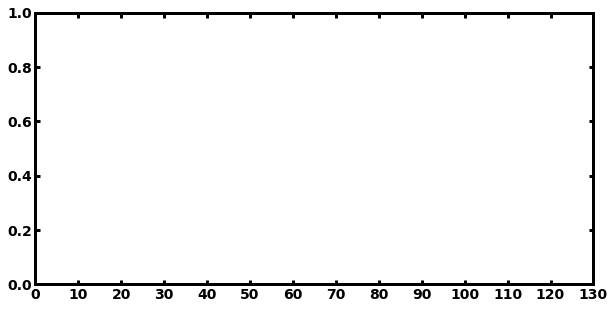

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.ylim([-0.22, 0.18])
plt.xticks(np.arange(0, 138.96, 10.0))
#plt.yticks(np.arange(np.min(pot_2[0]), np.max(pot_2[0]), 0.025))
#plt.xlim([0,138.96])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.tick_params(width=3, length=4.5)
plt.plot(data_623_tt, potential_623_tt, color='k', linewidth=2.5, alpha=0.25) #potential/2500
#plt.plot(running_mean(data_623_tt, 10), running_mean(potential_623_tt, 10), color='b', linewidth=2.5)
plt.plot(centered_running_mean(data_623_tt, 7),centered_running_mean(potential_623_tt, 7), color='b', linewidth=2.5, alpha=1)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5, linewidth=3)
plt.axvline(x=138.96/2, color='r', linestyle='--')
plt.axvline(x=138.96/2-5, color='r', linestyle='--')
plt.axvline(x=138.96/2+5, color='r', linestyle='--')
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=138.96-5, color='r', linestyle='--')
def format_func(value, tick_number):
    return f'{value:.2f}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
plt.xlabel('Perpendicular to GB ($\mathrm{\AA}$)')
plt.ylabel('Electrostatic potential (V)')
#plt.savefig('potential_idp_02_623.png', dpi=600, bbox_inches='tight')
plt.show()

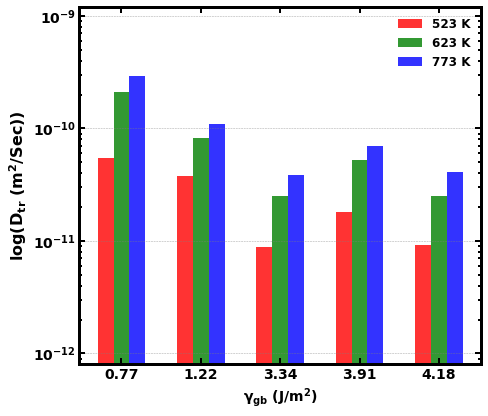

In [20]:
# Ensure gb_energy and gb_perp_* arrays are numpy arrays and have the correct shape
gb_energy = np.array(gb_energy).flatten()
gb_perp_523 = np.array(gb_perp_523).flatten()
gb_perp_623 = np.array(gb_perp_623).flatten()
gb_perp_773 = np.array(gb_perp_773).flatten()

# Now let's try combining and sorting again
combined_data_523 = np.column_stack((gb_energy, gb_perp_523))
combined_data_623 = np.column_stack((gb_energy, gb_perp_623))
combined_data_773 = np.column_stack((gb_energy, gb_perp_773))

# Sorting the combined data by GB energy
sorted_data_523 = combined_data_523[combined_data_523[:, 0].argsort()]
sorted_data_623 = combined_data_623[combined_data_623[:, 0].argsort()]
sorted_data_773 = combined_data_773[combined_data_773[:, 0].argsort()]


# Extracting sorted GB energy and diffusion values
sorted_gb_energy_523 = sorted_data_523[:, 0]
sorted_diffusion_523 = sorted_data_523[:, 1]

sorted_gb_energy_623 = sorted_data_623[:, 0]
sorted_diffusion_623 = sorted_data_623[:, 1]

sorted_gb_energy_773 = sorted_data_773[:, 0]
sorted_diffusion_773 = sorted_data_773[:, 1]

# Plotting the corrected bar chart
fig, ax = plt.subplots(figsize=(7, 6))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller
ax.tick_params(axis='both',          # Apply to both x and y axes
               which='major',         # Apply to both major and minor ticks
               direction='in',       # Direct ticks inward
               bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
               width=2,              # Tick width for all ticks
               length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart
bar_width = 0.2
opacity = 0.8
# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_gb_energy_523))

# Plotting the bar chart for selected temperatures after sorting
ax.bar(positions - bar_width, sorted_diffusion_523, bar_width, alpha=opacity, color='r', label='523 K')
ax.bar(positions, sorted_diffusion_623, bar_width, alpha=opacity, color='g', label='623 K')
ax.bar(positions + bar_width, sorted_diffusion_773, bar_width, alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels
ax.set_xlabel('$\mathbf{\gamma_{gb}}$ $\mathrm{\mathbf{(J/m^2)}}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{tr}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
ax.set_xticklabels(np.round(sorted_gb_energy_523, 2))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.8e-12, 1.2e-09)  # Setting y-axis limits to better visualize the data
ax.legend(loc='best', frameon=False, ncol=1, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_energy.png', dpi=600, bbox_inches='tight')
plt.show()



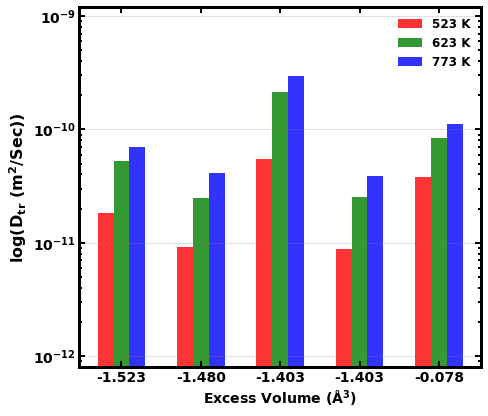

In [21]:
# Ensure excess_volume is a numpy array and has the correct shape
excess_volume = np.array(ex_vol).flatten()

# Combining excess volume with diffusion values for temperatures 523, 623, and 773
combined_data_vol_523 = np.column_stack((excess_volume, gb_perp_523))
combined_data_vol_623 = np.column_stack((excess_volume, gb_perp_623))
combined_data_vol_773 = np.column_stack((excess_volume, gb_perp_773))

# Sorting the combined data by excess volume
sorted_data_vol_523 = combined_data_vol_523[combined_data_vol_523[:, 0].argsort()]
sorted_data_vol_623 = combined_data_vol_623[combined_data_vol_623[:, 0].argsort()]
sorted_data_vol_773 = combined_data_vol_773[combined_data_vol_773[:, 0].argsort()]

# Plotting the corrected bar chart for Excess Volume vs Diffusivity, ensuring correct data structure
fig, ax = plt.subplots(figsize=(7, 6))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller
ax.tick_params(axis='both',          # Apply to both x and y axes
               which='major',         # Apply to both major and minor ticks
               direction='in',       # Direct ticks inward
               bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
               width=2,              # Tick width for all ticks
               length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Extracting sorted excess volume and diffusion values for plotting
positions_vol = np.arange(len(sorted_data_vol_523[:, 0]))

# Plotting the bar chart for selected temperatures after sorting by excess volume
ax.bar(positions_vol - bar_width, sorted_data_vol_523[:, 1], bar_width, alpha=opacity, color='r', label='523 K')
ax.bar(positions_vol, sorted_data_vol_623[:, 1], bar_width, alpha=opacity, color='g', label='623 K')
ax.bar(positions_vol + bar_width, sorted_data_vol_773[:, 1], bar_width, alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels for Excess Volume vs Diffusivity plot
ax.set_xlabel('Excess Volume $\mathrm{\mathbf{(\AA^3)}}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{tr}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs Excess Volume at Selected Temperatures')
ax.set_xticks(positions_vol)
ax.set_xticklabels(np.round(sorted_data_vol_523[:, 0], 2))
# Updating x-tick labels to show up to two decimal places, ensuring unique values are visible
ax.set_xticklabels([f'{x:.3f}' for x in sorted_data_vol_523[:, 0]])
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.8e-12, 1.2e-09)  # Setting y-axis limits to better visualize the data
ax.legend(loc='best', frameon=False, ncol=1, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_vs_excess_volume.png', dpi=600, bbox_inches='tight')
plt.show()


In [22]:
import scipy.constants as const
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms

temp = [523,573,623,673,723,773]

t_1 = 1000 / np.array(temp)           # temperature
plusminus = u"\u00B1"

In [23]:
# x in all cases gb and bulk 
Ea_x_5_1_b, c_x_5_1_b, _x_5_1_b = ms.msd.fit_arrhenius(temp, x_5_1_b)
Ea_x_5_1_gb, c_x_5_1_gb, _x_5_1_gb = ms.msd.fit_arrhenius(temp, x_5_1_gb)   
Ea_x_5_2_b, c_x_5_2_b, _x_5_2_b = ms.msd.fit_arrhenius(temp, x_5_2_b)
Ea_x_5_2_gb, c_x_5_2_gb, _x_5_2_gb = ms.msd.fit_arrhenius(temp, x_5_2_gb)
Ea_x_7_1_b, c_x_7_1_b, _x_7_1_b = ms.msd.fit_arrhenius(temp, x_7_1_b)
Ea_x_7_1_gb, c_x_7_1_gb, _x_7_1_gb = ms.msd.fit_arrhenius(temp, x_7_1_gb)
Ea_x_11_1_b, c_x_11_1_b, _x_11_1_b = ms.msd.fit_arrhenius(temp, x_11_1_b)
Ea_x_11_1_gb, c_x_11_1_gb, _x_11_1_gb = ms.msd.fit_arrhenius(temp, x_11_1_gb)
Ea_x_13_1_b, c_x_13_1_b, _x_13_1_b = ms.msd.fit_arrhenius(temp, x_13_1_b)
Ea_x_13_1_gb, c_x_13_1_gb, _x_13_1_gb = ms.msd.fit_arrhenius(temp, x_13_1_gb)


# Activation energy for diffusion in x direction
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion 
arr_x_5_1_b = (c_x_5_1_b * np.exp(-Ea_x_5_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_x_5_1_gb = (c_x_5_1_gb * np.exp(-Ea_x_5_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_x_5_2_b = (c_x_5_2_b * np.exp(-Ea_x_5_2_b / (const.k / const.e * np.array(temp))))*0.0001
arr_x_5_2_gb = (c_x_5_2_gb * np.exp(-Ea_x_5_2_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_x_7_1_b = (c_x_7_1_b * np.exp(-Ea_x_7_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_x_7_1_gb = (c_x_7_1_gb * np.exp(-Ea_x_7_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_x_11_1_b = (c_x_11_1_b * np.exp(-Ea_x_11_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_x_11_1_gb = (c_x_11_1_gb * np.exp(-Ea_x_11_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_x_13_1_b = (c_x_13_1_b * np.exp(-Ea_x_13_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_x_13_1_gb = (c_x_13_1_gb * np.exp(-Ea_x_13_1_gb / (const.k / const.e * np.array(temp))))*0.0001


In [24]:
# y in all cases gb and bulk
Ea_y_5_1_b, c_y_5_1_b, _y_5_1_b = ms.msd.fit_arrhenius(temp, y_5_1_b)
Ea_y_5_1_gb, c_y_5_1_gb, _y_5_1_gb = ms.msd.fit_arrhenius(temp, y_5_1_gb)
Ea_y_5_2_b, c_y_5_2_b, _y_5_2_b = ms.msd.fit_arrhenius(temp, y_5_2_b)
Ea_y_5_2_gb, c_y_5_2_gb, _y_5_2_gb = ms.msd.fit_arrhenius(temp, y_5_2_gb)
Ea_y_7_1_b, c_y_7_1_b, _y_7_1_b = ms.msd.fit_arrhenius(temp, y_7_1_b)
Ea_y_7_1_gb, c_y_7_1_gb, _y_7_1_gb = ms.msd.fit_arrhenius(temp, y_7_1_gb)
Ea_y_11_1_b, c_y_11_1_b, _y_11_1_b = ms.msd.fit_arrhenius(temp, y_11_1_b)
Ea_y_11_1_gb, c_y_11_1_gb, _y_11_1_gb = ms.msd.fit_arrhenius(temp, y_11_1_gb)
Ea_y_13_1_b, c_y_13_1_b, _y_13_1_b = ms.msd.fit_arrhenius(temp, y_13_1_b)
Ea_y_13_1_gb, c_y_13_1_gb, _y_13_1_gb = ms.msd.fit_arrhenius(temp, y_13_1_gb)

# Activation energy for diffusion in y direction
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
arr_y_5_1_b = (c_y_5_1_b * np.exp(-Ea_y_5_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_y_5_1_gb = (c_y_5_1_gb * np.exp(-Ea_y_5_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_y_5_2_b = (c_y_5_2_b * np.exp(-Ea_y_5_2_b / (const.k / const.e * np.array(temp))))*0.0001
arr_y_5_2_gb = (c_y_5_2_gb * np.exp(-Ea_y_5_2_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_y_7_1_b = (c_y_7_1_b * np.exp(-Ea_y_7_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_y_7_1_gb = (c_y_7_1_gb * np.exp(-Ea_y_7_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_y_11_1_b = (c_y_11_1_b * np.exp(-Ea_y_11_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_y_11_1_gb = (c_y_11_1_gb * np.exp(-Ea_y_11_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_y_13_1_b = (c_y_13_1_b * np.exp(-Ea_y_13_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_y_13_1_gb = (c_y_13_1_gb * np.exp(-Ea_y_13_1_gb / (const.k / const.e * np.array(temp))))*0.0001


In [25]:
# z in all cases gb and bulk
Ea_z_5_1_b, c_z_5_1_b, _z_5_1_b = ms.msd.fit_arrhenius(temp, z_5_1_b)
Ea_z_5_1_gb, c_z_5_1_gb, _z_5_1_gb = ms.msd.fit_arrhenius(temp, z_5_1_gb)
Ea_z_5_2_b, c_z_5_2_b, _z_5_2_b = ms.msd.fit_arrhenius(temp, z_5_2_b)
Ea_z_5_2_gb, c_z_5_2_gb, _z_5_2_gb = ms.msd.fit_arrhenius(temp, z_5_2_gb)
Ea_z_7_1_b, c_z_7_1_b, _z_7_1_b = ms.msd.fit_arrhenius(temp, z_7_1_b)
Ea_z_7_1_gb, c_z_7_1_gb, _z_7_1_gb = ms.msd.fit_arrhenius(temp, z_7_1_gb)
Ea_z_11_1_b, c_z_11_1_b, _z_11_1_b = ms.msd.fit_arrhenius(temp, z_11_1_b)
Ea_z_11_1_gb, c_z_11_1_gb, _z_11_1_gb = ms.msd.fit_arrhenius(temp, z_11_1_gb)
Ea_z_13_1_b, c_z_13_1_b, _z_13_1_b = ms.msd.fit_arrhenius(temp, z_13_1_b)
Ea_z_13_1_gb, c_z_13_1_gb, _z_13_1_gb = ms.msd.fit_arrhenius(temp, z_13_1_gb)

# Activation energy for diffusion in z direction
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
arr_z_5_1_b = (c_z_5_1_b * np.exp(-Ea_z_5_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_z_5_1_gb = (c_z_5_1_gb * np.exp(-Ea_z_5_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_z_5_2_b = (c_z_5_2_b * np.exp(-Ea_z_5_2_b / (const.k / const.e * np.array(temp))))*0.0001
arr_z_5_2_gb = (c_z_5_2_gb * np.exp(-Ea_z_5_2_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_z_7_1_b = (c_z_7_1_b * np.exp(-Ea_z_7_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_z_7_1_gb = (c_z_7_1_gb * np.exp(-Ea_z_7_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_z_11_1_b = (c_z_11_1_b * np.exp(-Ea_z_11_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_z_11_1_gb = (c_z_11_1_gb * np.exp(-Ea_z_11_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_z_13_1_b = (c_z_13_1_b * np.exp(-Ea_z_13_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_z_13_1_gb = (c_z_13_1_gb * np.exp(-Ea_z_13_1_gb / (const.k / const.e * np.array(temp))))*0.0001



In [ ]:
# total in all cases gb and bulk
Ea_tot_5_1_b, c_tot_5_1_b, _tot_5_1_b = ms.msd.fit_arrhenius(temp, tot_5_1_b)
Ea_tot_5_1_gb, c_tot_5_1_gb, _tot_5_1_gb = ms.msd.fit_arrhenius(temp, tot_5_1_gb)
Ea_tot_5_2_b, c_tot_5_2_b, _tot_5_2_b = ms.msd.fit_arrhenius(temp, tot_5_2_b)
Ea_tot_5_2_gb, c_tot_5_2_gb, _tot_5_2_gb = ms.msd.fit_arrhenius(temp, tot_5_2_gb)
Ea_tot_7_1_b, c_tot_7_1_b, _tot_7_1_b = ms.msd.fit_arrhenius(temp, tot_7_1_b)
Ea_tot_7_1_gb, c_tot_7_1_gb, _tot_7_1_gb = ms.msd.fit_arrhenius(temp, tot_7_1_gb)
Ea_tot_11_1_b, c_tot_11_1_b, _tot_11_1_b = ms.msd.fit_arrhenius(temp, tot_11_1_b)
Ea_tot_11_1_gb, c_tot_11_1_gb, _tot_11_1_gb = ms.msd.fit_arrhenius(temp, tot_11_1_gb)
Ea_tot_13_1_b, c_tot_13_1_b, _tot_13_1_b = ms.msd.fit_arrhenius(temp, tot_13_1_b)
Ea_tot_13_1_gb, c_tot_13_1_gb, _tot_13_1_gb = ms.msd.fit_arrhenius(temp, tot_13_1_gb)

# Activation energy for total diffusion
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
arr_tot_5_1_b = (c_tot_5_1_b * np.exp(-Ea_tot_5_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_5_1_gb = (c_tot_5_1_gb * np.exp(-Ea_tot_5_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_5_2_b = (c_tot_5_2_b * np.exp(-Ea_tot_5_2_b / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_5_2_gb = (c_tot_5_2_gb * np.exp(-Ea_tot_5_2_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_7_1_b = (c_tot_7_1_b * np.exp(-Ea_tot_7_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_7_1_gb = (c_tot_7_1_gb * np.exp(-Ea_tot_7_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_11_1_b = (c_tot_11_1_b * np.exp(-Ea_tot_11_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_11_1_gb = (c_tot_11_1_gb * np.exp(-Ea_tot_11_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_13_1_b = (c_tot_13_1_b * np.exp(-Ea_tot_13_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_13_1_gb = (c_tot_13_1_gb * np.exp(-Ea_tot_13_1_gb / (const.k / const.e * np.array(temp))))*0.0001



In [ ]:
tot_ov_gb_523 = [tot_5_1_gb[0], tot_5_2_gb[0], tot_7_1_gb[0], tot_11_1_gb[0], tot_13_1_gb[0]]
tot_ov_gb_573 = [tot_5_1_gb[1], tot_5_2_gb[1], tot_7_1_gb[1], tot_11_1_gb[1], tot_13_1_gb[1]]
tot_ov_gb_623 = [tot_5_1_gb[2], tot_5_2_gb[2], tot_7_1_gb[2], tot_11_1_gb[2], tot_13_1_gb[2]]
tot_ov_gb_673 = [tot_5_1_gb[3], tot_5_2_gb[3], tot_7_1_gb[3], tot_11_1_gb[3], tot_13_1_gb[3]]
tot_ov_gb_723 = [tot_5_1_gb[4], tot_5_2_gb[4], tot_7_1_gb[4], tot_11_1_gb[4], tot_13_1_gb[4]]
tot_ov_gb_773 = [tot_5_1_gb[5], tot_5_2_gb[5], tot_7_1_gb[5], tot_11_1_gb[5], tot_13_1_gb[5]]
print('------------------Overall Diffusivity ------------------')
print(tot_ov_gb_523)
print(tot_ov_gb_573)
print(tot_ov_gb_623)
print(tot_ov_gb_673)
print(tot_ov_gb_723)
print(tot_ov_gb_773)
print('--------------------------------------------------------')

------------------Overall Diffusivity ------------------
[2.7900406237737324e-11, 3.983632888565138e-11, 9.281755319974129e-11, 6.908917657750534e-11, 6.705403523620716e-11]
[4.427760685508036e-11, 6.990548431919216e-11, 2.0876711082912626e-10, 1.0422673910834687e-10, 1.1597744592863372e-10]
[7.100085838549065e-11, 9.632074685928865e-11, 3.274034541248917e-10, 1.731784240012938e-10, 1.6006781298049433e-10]
[1.1311715641871383e-10, 1.387364313300506e-10, 4.287395336081841e-10, 2.526425418328953e-10, 2.0989165823522812e-10]
[1.443397719796705e-10, 1.8853592895854605e-10, 6.030065122967413e-10, 2.7415241220055863e-10, 2.836899443141735e-10]
[1.891593986877637e-10, 2.6641364173193603e-10, 7.148558541449781e-10, 4.2535970393428154e-10, 3.798809590193574e-10]
--------------------------------------------------------


In [ ]:
# real bulk 
Ea_cry_x, c_cry_x, _cry_x = ms.msd.fit_arrhenius(temp, cry_x)
Ea_cry_y, c_cry_y, _cry_y = ms.msd.fit_arrhenius(temp, cry_y)
Ea_cry_z, c_cry_z, _cry_z = ms.msd.fit_arrhenius(temp, cry_z)
Ea_cry_tot, c_cry_tot, _cry_tot = ms.msd.fit_arrhenius(temp, cry_tot)

# Activation energy for diffusion in x direction
arr_cry_x = (c_cry_x * np.exp(-Ea_cry_x / (const.k / const.e * np.array(temp))))*0.0001
arr_cry_y = (c_cry_y * np.exp(-Ea_cry_y / (const.k / const.e * np.array(temp))))*0.0001
arr_cry_z = (c_cry_z * np.exp(-Ea_cry_z / (const.k / const.e * np.array(temp))))*0.0001
arr_cry_tot = (c_cry_tot * np.exp(-Ea_cry_tot / (const.k / const.e * np.array(temp))))*0.0001


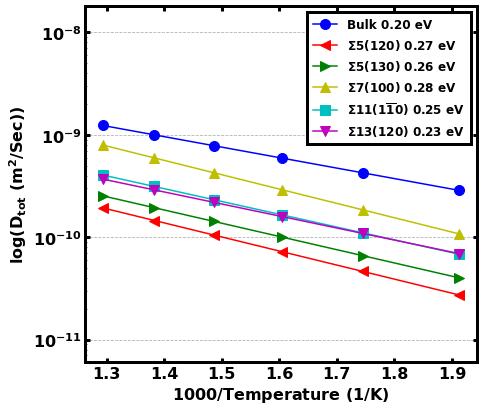

In [ ]:
# Plot total bulk in all cases

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.style.use(['vaibhz-sci','no-latex'])
#plt.rcParams['text.usetex'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)
label_str = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_tot_11_1_gb)
plt.errorbar(t_1, arr_tot_5_1_b, yerr=0, fmt='o-',markersize='10',elinewidth = 0, color='b', label='Bulk {:0.2f} eV'.format(Ea_tot_5_1_b))
plt.errorbar(t_1, arr_tot_5_1_gb, yerr=0, fmt='<-',markersize='10',elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_tot_5_1_gb))
plt.errorbar(t_1, arr_tot_5_2_gb, yerr=0, fmt='>-',markersize='10',elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_tot_5_2_gb))
plt.errorbar(t_1, arr_tot_7_1_gb, yerr=0, fmt='^-',markersize='10',elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV'.format(Ea_tot_7_1_gb))
plt.errorbar(t_1, arr_tot_11_1_gb, yerr=0, fmt='s-',markersize='10',elinewidth = 0, color='c', label=label_str)
plt.errorbar(t_1, arr_tot_13_1_gb, yerr=0, fmt='v-',markersize='10',elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_tot_13_1_gb))
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--')
plt.ylim(0.6e-11, 1.8e-8)
plt.xlabel("1000/$\mathrm{Temperature \ (1/K)}$", fontsize=16, fontweight='bold')
plt.ylabel("$\mathrm{log(D_{tot}\ (m^2/Sec))}$", fontsize=16, fontweight='bold')
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('diffusion_all_gb.png', dpi=600, bbox_inches='tight')
plt.show()
# total bulk will be same for all cases as it is sum of all directions which needs to be maintian even after rotation of original crystal

In [ ]:
# print Ea, and pre-exponential factor for all cases
print('Bulk')
print(Ea_tot_5_1_b, c_tot_5_1_b*0.0001)
print(Ea_tot_5_2_b, c_tot_5_2_b*0.0001)
print(Ea_tot_7_1_b, c_tot_7_1_b*0.0001)
print(Ea_tot_11_1_b, c_tot_11_1_b*0.0001)
print(Ea_tot_13_1_b, c_tot_13_1_b*0.0001)
print('GB')
print(Ea_tot_5_1_gb, c_tot_5_1_gb*0.0001)
print(Ea_tot_5_2_gb, c_tot_5_2_gb*0.0001)
print(Ea_tot_7_1_gb, c_tot_7_1_gb*0.0001)
print(Ea_tot_11_1_gb, c_tot_11_1_gb*0.0001)
print(Ea_tot_13_1_gb, c_tot_13_1_gb*0.0001)


Bulk
0.20320095450736042 2.6078260691922187e-08
0.20320095450736042 2.6078260691922187e-08
0.203200954507361 2.607826069192246e-08
0.203200954507361 2.607826069192246e-08
0.203200954507361 2.607826069192246e-08
GB
0.27256038941105576 1.1567640649393938e-08
0.25670189886592903 1.1953811260861762e-08
0.27809667395609744 5.165654307217814e-08
0.24808035811662568 1.6781598508799273e-08
0.23312134977905732 1.2222196693858177e-08


In [ ]:
ea_overall = [Ea_tot_5_1_gb, Ea_tot_5_2_gb, Ea_tot_7_1_gb, Ea_tot_11_1_gb, Ea_tot_13_1_gb]
c_overall = [c_tot_5_1_gb*0.0001, c_tot_5_2_gb*0.0001, c_tot_7_1_gb*0.0001, c_tot_11_1_gb*0.0001, c_tot_13_1_gb*0.0001]

print('------------------Overall activation and pre-expo factor ------------------')
print(ea_overall)
print(c_overall)
print('---------------------------------------------------------------------------')

------------------Overall activation and pre-expo factor ------------------
[0.27256038941105576, 0.25670189886592903, 0.27809667395609744, 0.24808035811662568, 0.23312134977905732]
[1.1567640649393938e-08, 1.1953811260861762e-08, 5.165654307217814e-08, 1.6781598508799273e-08, 1.2222196693858177e-08]
---------------------------------------------------------------------------


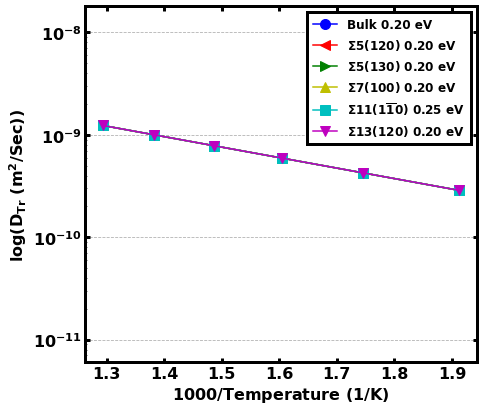

In [ ]:
# Total diffusion in bulk after rotation of original crystal

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.style.use(['vaibhz-sci','no-latex'])
#plt.rcParams['text.usetex'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)
label_str = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_tot_11_1_gb)
plt.errorbar(t_1, arr_cry_tot, yerr=0, fmt='o-',markersize='10',elinewidth = 0, color='b', label='Bulk {:0.2f} eV'.format(Ea_cry_tot))
plt.errorbar(t_1, arr_tot_5_1_b, yerr=0, fmt='<-',markersize='10',elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_tot_5_1_b))
plt.errorbar(t_1, arr_tot_5_2_b, yerr=0, fmt='>-',markersize='10',elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_tot_5_2_b))
plt.errorbar(t_1, arr_tot_7_1_b, yerr=0, fmt='^-',markersize='10',elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV'.format(Ea_tot_7_1_b))
plt.errorbar(t_1, arr_tot_11_1_b, yerr=0, fmt='s-',markersize='10',elinewidth = 0, color='c', label=label_str)
plt.errorbar(t_1, arr_tot_13_1_b, yerr=0, fmt='v-',markersize='10',elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_tot_13_1_b))
plt.yscale('log')

plt.grid(True, axis='y', linestyle='--')
plt.ylim(0.6e-11, 1.8e-8)
plt.xlabel("1000/$\mathrm{Temperature \ (1/K)}$", fontsize=16, fontweight='bold')
plt.ylabel("$\mathrm{log(D_{Tr}\ (m^2/Sec))}$", fontsize=16, fontweight='bold')
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('diffusion_all_bulk.png', dpi=600, bbox_inches='tight')
plt.show()




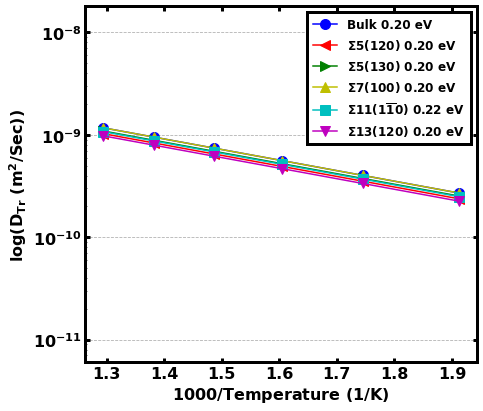

In [ ]:
# Plot x direction in bulk after rotation of original crystal

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.style.use(['vaibhz-sci','no-latex'])

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3

plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

label_str = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_x_11_1_gb)
plt.errorbar(t_1, arr_cry_x, yerr=0, fmt='o-',markersize='10',elinewidth = 0, color='b', label='Bulk {:0.2f} eV'.format(Ea_cry_x))
plt.errorbar(t_1, arr_x_5_1_b, yerr=0, fmt='<-',markersize='10',elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_x_5_1_b))
plt.errorbar(t_1, arr_x_5_2_b, yerr=0, fmt='>-',markersize='10',elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_x_5_2_b))
plt.errorbar(t_1, arr_x_7_1_b, yerr=0, fmt='^-',markersize='10',elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV'.format(Ea_x_7_1_b))
plt.errorbar(t_1, arr_x_11_1_b, yerr=0, fmt='s-',markersize='10',elinewidth = 0, color='c', label=label_str)
plt.errorbar(t_1, arr_x_13_1_b, yerr=0, fmt='v-',markersize='10',elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_x_13_1_b))
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--')
plt.ylim(0.6e-11, 1.8e-8)
plt.xlabel("1000/$\mathrm{Temperature \ (1/K)}$", fontsize=16, fontweight='bold')
plt.ylabel("$\mathrm{log(D_{Tr}\ (m^2/Sec))}$", fontsize=16, fontweight='bold')
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('diffusion_x_bulk.png', dpi=600, bbox_inches='tight')
plt.show()


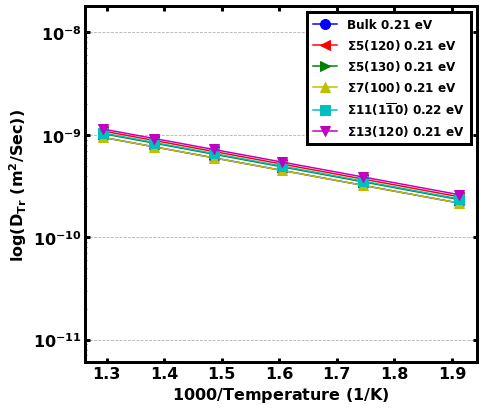

In [ ]:
# Plot y direction in bulk after rotation of original crystal

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.style.use(['vaibhz-sci','no-latex'])

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3

plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

label_str = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_y_11_1_gb)
plt.errorbar(t_1, arr_cry_y, yerr=0, fmt='o-',markersize='10',elinewidth = 0, color='b', label='Bulk {:0.2f} eV'.format(Ea_cry_y))
plt.errorbar(t_1, arr_y_5_1_b, yerr=0, fmt='<-',markersize='10',elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_y_5_1_b))
plt.errorbar(t_1, arr_y_5_2_b, yerr=0, fmt='>-',markersize='10',elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_y_5_2_b))
plt.errorbar(t_1, arr_y_7_1_b, yerr=0, fmt='^-',markersize='10',elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV'.format(Ea_y_7_1_b))
plt.errorbar(t_1, arr_y_11_1_b, yerr=0, fmt='s-',markersize='10',elinewidth = 0, color='c', label=label_str)
plt.errorbar(t_1, arr_y_13_1_b, yerr=0, fmt='v-',markersize='10',elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_y_13_1_b))
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--')
plt.ylim(0.6e-11, 1.8e-8)
plt.xlabel("1000/$\mathrm{Temperature \ (1/K)}$", fontsize=16, fontweight='bold')
plt.ylabel("$\mathrm{log(D_{Tr}\ (m^2/Sec))}$", fontsize=16, fontweight='bold')
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('diffusion_y_bulk.png', dpi=600, bbox_inches='tight')
plt.show()


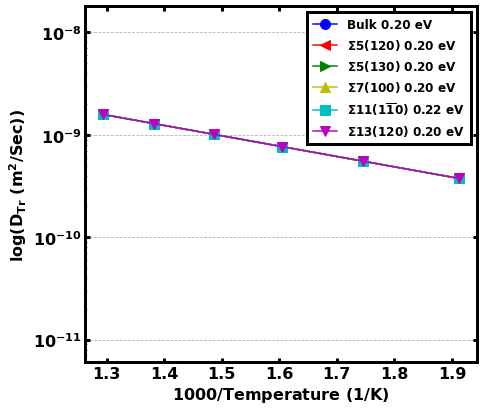

In [ ]:
# Plot z direction in bulk after rotation of original crystal

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.style.use(['vaibhz-sci','no-latex'])

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3

plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

label_str = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_y_11_1_gb)
plt.errorbar(t_1, arr_cry_z, yerr=0, fmt='o-',markersize='10',elinewidth = 0, color='b', label='Bulk {:0.2f} eV'.format(Ea_cry_z))
plt.errorbar(t_1, arr_z_5_1_b, yerr=0, fmt='<-',markersize='10',elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_z_5_1_b))
plt.errorbar(t_1, arr_z_5_2_b, yerr=0, fmt='>-',markersize='10',elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_z_5_2_b))
plt.errorbar(t_1, arr_z_7_1_b, yerr=0, fmt='^-',markersize='10',elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV'.format(Ea_z_7_1_b))
plt.errorbar(t_1, arr_z_11_1_b, yerr=0, fmt='s-',markersize='10',elinewidth = 0, color='c', label=label_str)
plt.errorbar(t_1, arr_z_13_1_b, yerr=0, fmt='v-',markersize='10',elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_z_13_1_b))
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--')
plt.ylim(0.6e-11, 1.8e-8)
plt.xlabel("1000/$\mathrm{Temperature \ (1/K)}$", fontsize=16, fontweight='bold')
plt.ylabel("$\mathrm{log(D_{Tr}\ (m^2/Sec))}$", fontsize=16, fontweight='bold')
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('diffusion_z_bulk.png', dpi=600, bbox_inches='tight')
plt.show()




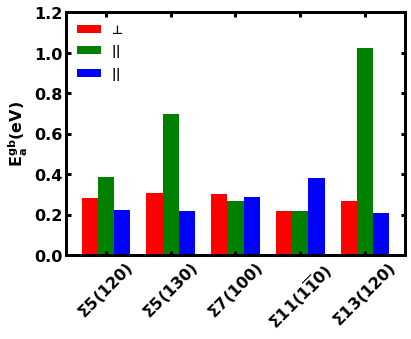

In [ ]:
# Plot activation energies along x, y and z directions for all GBs a bar chart relative to bulk values

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# Set the width of the bars
barWidth = 0.25

name = ['$\Sigma 5 (120)$', '$\Sigma 5 (130)$', '$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$', '$\Sigma 13 (120)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, [Ea_y_5_1_gb, Ea_y_5_2_gb, Ea_z_7_1_gb, Ea_x_11_1_gb, Ea_y_13_1_gb], color='r', width=barWidth, edgecolor='none', label='$\mathrm{⊥}$')
plt.bar(r2, [Ea_x_5_1_gb, Ea_x_5_2_gb, Ea_x_7_1_gb, Ea_y_11_1_gb, Ea_x_13_1_gb], color='g', width=barWidth, edgecolor='none', label='$\mathrm{{||}}$')
plt.bar(r3, [Ea_z_5_1_gb, Ea_z_5_2_gb, Ea_y_7_1_gb, Ea_z_11_1_gb, Ea_z_13_1_gb], color='b', width=barWidth, edgecolor='none', label='$\mathrm{{||}}$')
# Add xticks on the middle of the group bars
#plt.xlabel('GB', fontweight='bold')
#plt.grid(True, axis='y', linestyle='--')
# plot y ticks for 2 decimal places
plt.xticks([r + barWidth for r in range(len(name))], name, rotation=45)
plt.ylabel('$\mathrm{E^{gb}_{a} (eV)}$', fontweight='bold', fontsize=16)
#plt.yticks(np.arange(0, 1, 0.15))
plt.ylim(0, 1.2)
#plt.yticks(np.arange(0, 0.1, 0.05))
plt.legend(loc='best', frameon=False, ncol=1, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('activation.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
act_perp = [Ea_y_5_1_gb, Ea_y_5_2_gb, Ea_z_7_1_gb, Ea_x_11_1_gb, Ea_y_13_1_gb]
pre_expo_perp = [c_y_5_1_gb*0.0001, c_y_5_2_gb*0.0001, c_z_7_1_gb*0.0001, c_x_11_1_gb*0.0001, c_y_13_1_gb*0.0001]
act_pr_1 = [Ea_x_5_1_gb, Ea_x_5_2_gb, Ea_x_7_1_gb, Ea_y_11_1_gb, Ea_x_13_1_gb]
pre_expo_pr_1 = [c_x_5_1_gb*0.0001, c_x_5_2_gb*0.0001, c_x_7_1_gb*0.0001, c_y_11_1_gb*0.0001, c_x_13_1_gb*0.0001]
act_pr_2 = [Ea_z_5_1_gb, Ea_z_5_2_gb, Ea_y_7_1_gb, Ea_z_11_1_gb, Ea_z_13_1_gb]
pre_expo_perp_2 = [c_z_5_1_gb*0.0001, c_z_5_2_gb*0.0001, c_y_7_1_gb*0.0001, c_z_11_1_gb*0.0001, c_z_13_1_gb*0.0001]

In [ ]:
print('------------------Activation and pre-expo factor (⊥ GB)------------------')
print(act_perp)
print(pre_expo_perp)
print(act_pr_1)
print(pre_expo_pr_1)
print(act_pr_2)
print(pre_expo_perp_2)
print('Avg.')
print([(act_pr_1[0]+act_pr_2[0])/2, (act_pr_1[1]+act_pr_2[1])/2, (act_pr_1[2]+act_pr_2[2])/2, (act_pr_1[3]+act_pr_2[3])/2, (act_pr_1[4]+act_pr_2[4])/2])
print([(pre_expo_pr_1[0]+pre_expo_perp_2[0])/2, (pre_expo_pr_1[1]+pre_expo_perp_2[1])/2, (pre_expo_pr_1[2]+pre_expo_perp_2[2])/2, (pre_expo_pr_1[3]+pre_expo_perp_2[3])/2, (pre_expo_pr_1[4]+pre_expo_perp_2[4])/2])
print('-------------------------------------------------------------------------')

------------------Activation and pre-expo factor (⊥ GB)------------------
[0.28132315917739403, 0.30836636431974696, 0.2994611291814997, 0.2155995898740846, 0.26772944548142663]
[4.734464336469824e-09, 8.0930091122912e-09, 4.8286109770175346e-08, 4.520665250560901e-09, 7.549927839982114e-09]
[0.38449640846245364, 0.6961002260940693, 0.2658437906353755, 0.21771428007121466, 1.0251203590534061]
[7.194654426892885e-08, 7.877310335479524e-06, 6.23522743773438e-08, 1.788709871444649e-08, 0.0019763345458960165]
[0.22326010957583883, 0.21604169982334187, 0.28424551497856804, 0.3793684207768172, 0.206252193885547]
[8.45695707946223e-09, 1.3615677149974278e-08, 4.937380768615895e-08, 1.1122110119563141e-07, 1.8274166654890606e-08]
Avg.
[0.3038782590191462, 0.4560709629587056, 0.27504465280697177, 0.2985413504240159, 0.6156862764694766]
[4.020175067419554e-08, 3.945463006314749e-06, 5.586304103175137e-08, 6.455409995503895e-08, 0.0009881764100313356]
---------------------------------------------

In [ ]:
act_en_avg_para = [0.3038782590191462, 0.4560709629587056, 0.27504465280697177, 0.2985413504240159, 0.6156862764694766]

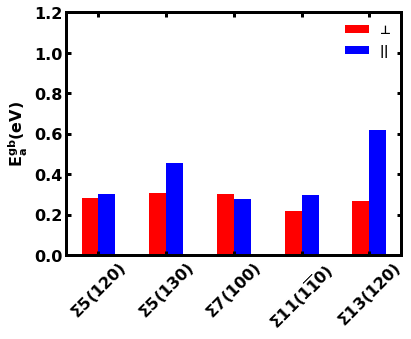

In [ ]:
# Plot activation energies along x, y and z directions for all GBs a bar chart relative to bulk values

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# Set the width of the bars
barWidth = 0.25

name = ['$\Sigma 5 (120)$', '$\Sigma 5 (130)$', '$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$', '$\Sigma 13 (120)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, [Ea_y_5_1_gb, Ea_y_5_2_gb, Ea_z_7_1_gb, Ea_x_11_1_gb, Ea_y_13_1_gb], color='r', width=barWidth, edgecolor='none', label='$\mathrm{⊥}$')
plt.bar(r2, [0.3038782590191462, 0.4560709629587056, 0.27504465280697177, 0.2985413504240159, 0.6156862764694766], color='b', width=barWidth, edgecolor='none', label='$\mathrm{{||}}$')
#plt.bar(r3, [Ea_z_5_1_gb, Ea_z_5_2_gb, Ea_y_7_1_gb, Ea_z_11_1_gb, Ea_z_13_1_gb], color='b', width=barWidth, edgecolor='none', label='$\mathrm{{||}}$')
# Add xticks on the middle of the group bars
#plt.xlabel('GB', fontweight='bold')
#plt.grid(True, axis='y', linestyle='--')
# plot y ticks for 2 decimal places
plt.xticks([r + barWidth/2 for r in range(len(name))], name, rotation=45)
plt.ylabel('$\mathrm{E^{gb}_{a} (eV)}$', fontweight='bold', fontsize=16)
#plt.yticks(np.arange(0, 1, 0.15))
plt.ylim(0, 1.2)
#plt.yticks(np.arange(0, 0.1, 0.05))
plt.legend(loc='best', frameon=False, ncol=1, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('activation_1.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# print ration of Gb diffusion to bulk diffusion in x, y, z and total directions

print('----> Ratio of GB diffusion to bulk diffusion in x direction <----')
print('5(120)=', x_5_1_gb[0]/x_5_1_b[0], x_5_1_gb[1]/x_5_1_b[1], x_5_1_gb[2]/x_5_1_b[2], x_5_1_gb[3]/x_5_1_b[3], x_5_1_gb[4]/x_5_1_b[4], x_5_1_gb[5]/x_5_1_b[5])
print('5(130)=', x_5_2_gb[0]/x_5_2_b[0], x_5_2_gb[1]/x_5_2_b[1], x_5_2_gb[2]/x_5_2_b[2], x_5_2_gb[3]/x_5_2_b[3], x_5_2_gb[4]/x_5_2_b[4], x_5_2_gb[5]/x_5_2_b[5])
print('7(100)=', x_7_1_gb[0]/x_7_1_b[0], x_7_1_gb[1]/x_7_1_b[1], x_7_1_gb[2]/x_7_1_b[2], x_7_1_gb[3]/x_7_1_b[3], x_7_1_gb[4]/x_7_1_b[4], x_7_1_gb[5]/x_7_1_b[5])
print('11(110)=', x_11_1_gb[0]/x_11_1_b[0], x_11_1_gb[1]/x_11_1_b[1], x_11_1_gb[2]/x_11_1_b[2], x_11_1_gb[3]/x_11_1_b[3], x_11_1_gb[4]/x_11_1_b[4], x_11_1_gb[5]/x_11_1_b[5])
print('13(120)=', x_13_1_gb[0]/x_13_1_b[0], x_13_1_gb[1]/x_13_1_b[1], x_13_1_gb[2]/x_13_1_b[2], x_13_1_gb[3]/x_13_1_b[3], x_13_1_gb[4]/x_13_1_b[4], x_13_1_gb[5]/x_13_1_b[5])
print('-------------------------------------------------------------------')

gb_5_1_x_ratio = [x_5_1_gb[0]/x_5_1_b[0], x_5_1_gb[1]/x_5_1_b[1], x_5_1_gb[2]/x_5_1_b[2], x_5_1_gb[3]/x_5_1_b[3], x_5_1_gb[4]/x_5_1_b[4], x_5_1_gb[5]/x_5_1_b[5]]
gb_5_2_x_ratio = [x_5_2_gb[0]/x_5_2_b[0], x_5_2_gb[1]/x_5_2_b[1], x_5_2_gb[2]/x_5_2_b[2], x_5_2_gb[3]/x_5_2_b[3], x_5_2_gb[4]/x_5_2_b[4], x_5_2_gb[5]/x_5_2_b[5]]
gb_7_1_x_ratio = [x_7_1_gb[0]/x_7_1_b[0], x_7_1_gb[1]/x_7_1_b[1], x_7_1_gb[2]/x_7_1_b[2], x_7_1_gb[3]/x_7_1_b[3], x_7_1_gb[4]/x_7_1_b[4], x_7_1_gb[5]/x_7_1_b[5]]
gb_11_1_x_ratio = [x_11_1_gb[0]/x_11_1_b[0], x_11_1_gb[1]/x_11_1_b[1], x_11_1_gb[2]/x_11_1_b[2], x_11_1_gb[3]/x_11_1_b[3], x_11_1_gb[4]/x_11_1_b[4], x_11_1_gb[5]/x_11_1_b[5]]
gb_13_1_x_ratio = [x_13_1_gb[0]/x_13_1_b[0], x_13_1_gb[1]/x_13_1_b[1], x_13_1_gb[2]/x_13_1_b[2], x_13_1_gb[3]/x_13_1_b[3], x_13_1_gb[4]/x_13_1_b[4], x_13_1_gb[5]/x_13_1_b[5]]


----> Ratio of GB diffusion to bulk diffusion in x direction <----
5(120)= 0.06562625069478101 0.06579382008942523 0.1220106049331838 0.16913540783694678 0.19092168115675592 0.1937065499856368
5(130)= 0.003104113525819736 0.0321861706486932 0.047735306817355834 0.07414929624711418 0.11436451496287542 0.15358109620171365
7(100)= 0.5465547662532889 0.7977021803664919 0.9296146247876143 0.8039073183329004 0.9193600463733023 0.9183282951807229
11(110)= 0.154447926033069 0.15111882924551298 0.16535322386399376 0.1606472121271171 0.14375578986014778 0.18149905715146464
13(120)= 0.00015635539614125397 0.03393973774529513 0.08444307901306856 0.0751433210415173 0.15143159380190255 0.13953975940926217
-------------------------------------------------------------------


In [ ]:
print('----> Ratio of GB diffusion to bulk diffusion in y direction <----')
print('5(120)=', y_5_1_gb[0]/y_5_1_b[0], y_5_1_gb[1]/y_5_1_b[1], y_5_1_gb[2]/y_5_1_b[2], y_5_1_gb[3]/y_5_1_b[3], y_5_1_gb[4]/y_5_1_b[4], y_5_1_gb[5]/y_5_1_b[5])
print('5(130)=', y_5_2_gb[0]/y_5_2_b[0], y_5_2_gb[1]/y_5_2_b[1], y_5_2_gb[2]/y_5_2_b[2], y_5_2_gb[3]/y_5_2_b[3], y_5_2_gb[4]/y_5_2_b[4], y_5_2_gb[5]/y_5_2_b[5])
print('7(100)=', y_7_1_gb[0]/y_7_1_b[0], y_7_1_gb[1]/y_7_1_b[1], y_7_1_gb[2]/y_7_1_b[2], y_7_1_gb[3]/y_7_1_b[3], y_7_1_gb[4]/y_7_1_b[4], y_7_1_gb[5]/y_7_1_b[5])
print('11(110)=', y_11_1_gb[0]/y_11_1_b[0], y_11_1_gb[1]/y_11_1_b[1], y_11_1_gb[2]/y_11_1_b[2], y_11_1_gb[3]/y_11_1_b[3], y_11_1_gb[4]/y_11_1_b[4], y_11_1_gb[5]/y_11_1_b[5])
print('13(120)=', y_13_1_gb[0]/y_13_1_b[0], y_13_1_gb[1]/y_13_1_b[1], y_13_1_gb[2]/y_13_1_b[2], y_13_1_gb[3]/y_13_1_b[3], y_13_1_gb[4]/y_13_1_b[4], y_13_1_gb[5]/y_13_1_b[5])
print('-------------------------------------------------------------------')

gb_5_1_y_ratio = [y_5_1_gb[0]/y_5_1_b[0], y_5_1_gb[1]/y_5_1_b[1], y_5_1_gb[2]/y_5_1_b[2], y_5_1_gb[3]/y_5_1_b[3], y_5_1_gb[4]/y_5_1_b[4], y_5_1_gb[5]/y_5_1_b[5]]
gb_5_2_y_ratio = [y_5_2_gb[0]/y_5_2_b[0], y_5_2_gb[1]/y_5_2_b[1], y_5_2_gb[2]/y_5_2_b[2], y_5_2_gb[3]/y_5_2_b[3], y_5_2_gb[4]/y_5_2_b[4], y_5_2_gb[5]/y_5_2_b[5]]
gb_7_1_y_ratio = [y_7_1_gb[0]/y_7_1_b[0], y_7_1_gb[1]/y_7_1_b[1], y_7_1_gb[2]/y_7_1_b[2], y_7_1_gb[3]/y_7_1_b[3], y_7_1_gb[4]/y_7_1_b[4], y_7_1_gb[5]/y_7_1_b[5]]
gb_11_1_y_ratio = [y_11_1_gb[0]/y_11_1_b[0], y_11_1_gb[1]/y_11_1_b[1], y_11_1_gb[2]/y_11_1_b[2], y_11_1_gb[3]/y_11_1_b[3], y_11_1_gb[4]/y_11_1_b[4], y_11_1_gb[5]/y_11_1_b[5]]
gb_13_1_y_ratio = [y_13_1_gb[0]/y_13_1_b[0], y_13_1_gb[1]/y_13_1_b[1], y_13_1_gb[2]/y_13_1_b[2], y_13_1_gb[3]/y_13_1_b[3], y_13_1_gb[4]/y_13_1_b[4], y_13_1_gb[5]/y_13_1_b[5]]


----> Ratio of GB diffusion to bulk diffusion in y direction <----
5(120)= 0.03766013939065222 0.03907835247363397 0.05115133077174325 0.05723314960232787 0.0605778000784417 0.05922798133587232
5(130)= 0.03864983528094907 0.04255459056703419 0.05432806102633221 0.057760762351757526 0.07302286030918513 0.07692866028298309
7(100)= 0.3694029892400005 0.5133414472090267 0.6299126613301602 0.6265519156517365 0.7168414441628259 0.6339145796674032
11(110)= 0.6058256412537841 0.5970343247619976 0.6538670458404153 0.6388169034610123 0.6150737700230634 0.6694193935400977
13(120)= 0.07110404504444964 0.09258064969583465 0.10337604661085917 0.09364881285326243 0.11463109698552562 0.11732421965211601
-------------------------------------------------------------------


In [ ]:
print('----> Ratio of GB diffusion to bulk diffusion in z direction <----')
print('5(120)=', z_5_1_gb[0]/z_5_1_b[0], z_5_1_gb[1]/z_5_1_b[1], z_5_1_gb[2]/z_5_1_b[2], z_5_1_gb[3]/z_5_1_b[3], z_5_1_gb[4]/z_5_1_b[4], z_5_1_gb[5]/z_5_1_b[5])
print('5(130)=', z_5_2_gb[0]/z_5_2_b[0], z_5_2_gb[1]/z_5_2_b[1], z_5_2_gb[2]/z_5_2_b[2], z_5_2_gb[3]/z_5_2_b[3], z_5_2_gb[4]/z_5_2_b[4], z_5_2_gb[5]/z_5_2_b[5])
print('7(100)=', z_7_1_gb[0]/z_7_1_b[0], z_7_1_gb[1]/z_7_1_b[1], z_7_1_gb[2]/z_7_1_b[2], z_7_1_gb[3]/z_7_1_b[3], z_7_1_gb[4]/z_7_1_b[4], z_7_1_gb[5]/z_7_1_b[5])
print('11(110)=', z_11_1_gb[0]/z_11_1_b[0], z_11_1_gb[1]/z_11_1_b[1], z_11_1_gb[2]/z_11_1_b[2], z_11_1_gb[3]/z_11_1_b[3], z_11_1_gb[4]/z_11_1_b[4], z_11_1_gb[5]/z_11_1_b[5])
print('13(120)=', z_13_1_gb[0]/z_13_1_b[0], z_13_1_gb[1]/z_13_1_b[1], z_13_1_gb[2]/z_13_1_b[2], z_13_1_gb[3]/z_13_1_b[3], z_13_1_gb[4]/z_13_1_b[4], z_13_1_gb[5]/z_13_1_b[5])
print('-------------------------------------------------------------------')

gb_5_1_z_ratio = [z_5_1_gb[0]/z_5_1_b[0], z_5_1_gb[1]/z_5_1_b[1], z_5_1_gb[2]/z_5_1_b[2], z_5_1_gb[3]/z_5_1_b[3], z_5_1_gb[4]/z_5_1_b[4], z_5_1_gb[5]/z_5_1_b[5]]
gb_5_2_z_ratio = [z_5_2_gb[0]/z_5_2_b[0], z_5_2_gb[1]/z_5_2_b[1], z_5_2_gb[2]/z_5_2_b[2], z_5_2_gb[3]/z_5_2_b[3], z_5_2_gb[4]/z_5_2_b[4], z_5_2_gb[5]/z_5_2_b[5]]
gb_7_1_z_ratio = [z_7_1_gb[0]/z_7_1_b[0], z_7_1_gb[1]/z_7_1_b[1], z_7_1_gb[2]/z_7_1_b[2], z_7_1_gb[3]/z_7_1_b[3], z_7_1_gb[4]/z_7_1_b[4], z_7_1_gb[5]/z_7_1_b[5]]
gb_11_1_z_ratio = [z_11_1_gb[0]/z_11_1_b[0], z_11_1_gb[1]/z_11_1_b[1], z_11_1_gb[2]/z_11_1_b[2], z_11_1_gb[3]/z_11_1_b[3], z_11_1_gb[4]/z_11_1_b[4], z_11_1_gb[5]/z_11_1_b[5]]
gb_13_1_z_ratio = [z_13_1_gb[0]/z_13_1_b[0], z_13_1_gb[1]/z_13_1_b[1], z_13_1_gb[2]/z_13_1_b[2], z_13_1_gb[3]/z_13_1_b[3], z_13_1_gb[4]/z_13_1_b[4], z_13_1_gb[5]/z_13_1_b[5]]


----> Ratio of GB diffusion to bulk diffusion in z direction <----
5(120)= 0.16155486096153848 0.15893326184060808 0.1703759257979182 0.18800257307308088 0.18819774100762884 0.17864054687731143
5(130)= 0.30018395947916676 0.3086909378762116 0.31625321789356436 0.3254806263858018 0.3373054253822315 0.3296347557035006
7(100)= 0.14895164231072058 0.20100914279438664 0.27962117251442287 0.2932683190055469 0.3490820418803508 0.2683883976862586
11(110)= 0.07680100697772149 0.05404154379815063 0.17180188931200782 0.21402343388918788 0.16386069278448895 0.21994181580528827
13(120)= 0.49970946810606054 0.5072152066191588 0.5129718183612362 0.512625316257379 0.5226898653700226 0.519127015349104
-------------------------------------------------------------------


In [ ]:
print('----> Ratio of GB diffusion to bulk diffusion in total direction <----')
print('5(120)=', tot_5_1_gb[0]/tot_5_1_b[0], tot_5_1_gb[1]/tot_5_1_b[1], tot_5_1_gb[2]/tot_5_1_b[2], tot_5_1_gb[3]/tot_5_1_b[3], tot_5_1_gb[4]/tot_5_1_b[4], tot_5_1_gb[5]/tot_5_1_b[5])
print('5(130)=', tot_5_2_gb[0]/tot_5_2_b[0], tot_5_2_gb[1]/tot_5_2_b[1], tot_5_2_gb[2]/tot_5_2_b[2], tot_5_2_gb[3]/tot_5_2_b[3], tot_5_2_gb[4]/tot_5_2_b[4], tot_5_2_gb[5]/tot_5_2_b[5])
print('7(100)=', tot_7_1_gb[0]/tot_7_1_b[0], tot_7_1_gb[1]/tot_7_1_b[1], tot_7_1_gb[2]/tot_7_1_b[2], tot_7_1_gb[3]/tot_7_1_b[3], tot_7_1_gb[4]/tot_7_1_b[4], tot_7_1_gb[5]/tot_7_1_b[5])
print('11(110)=', tot_11_1_gb[0]/tot_11_1_b[0], tot_11_1_gb[1]/tot_11_1_b[1], tot_11_1_gb[2]/tot_11_1_b[2], tot_11_1_gb[3]/tot_11_1_b[3], tot_11_1_gb[4]/tot_11_1_b[4], tot_11_1_gb[5]/tot_11_1_b[5])
print('13(120)=', tot_13_1_gb[0]/tot_13_1_b[0], tot_13_1_gb[1]/tot_13_1_b[1], tot_13_1_gb[2]/tot_13_1_b[2], tot_13_1_gb[3]/tot_13_1_b[3], tot_13_1_gb[4]/tot_13_1_b[4], tot_13_1_gb[5]/tot_13_1_b[5])
print('-------------------------------------------------------------------')

----> Ratio of GB diffusion to bulk diffusion in total direction <----
5(120)= 0.09910160870614727 0.09875311914745456 0.12322972239309912 0.1433495835999415 0.1505630444850527 0.14850784990665
5(130)= 0.14149773461633217 0.1559114214241146 0.16717514641473288 0.17581603260683132 0.19666473813478383 0.2091596684800084
7(100)= 0.3296858389761117 0.4656169299586492 0.5682443519668351 0.5433272508024132 0.6290054022566844 0.561228818809519
11(110)= 0.24540318462291746 0.2324587148353585 0.30057001562272556 0.32016543129247915 0.28597261356108344 0.3339472186231667
13(120)= 0.23817440884279137 0.2586665212890501 0.27781512232657374 0.2659886684009988 0.2959213605502506 0.2982421430592673
-------------------------------------------------------------------


In [ ]:
# Total diffusivity at 523, 623 and 773 K for all GBs

bulk_tot = [tot_5_1_b[0], tot_5_1_b[2], tot_5_1_b[5]]
gb_5_1 = [tot_5_1_gb[0], tot_5_1_gb[2], tot_5_1_gb[5]]
gb_5_2 = [tot_5_2_gb[0], tot_5_2_gb[2], tot_5_2_gb[5]]
gb_7_1 = [tot_7_1_gb[0], tot_7_1_gb[2], tot_7_1_gb[5]]
gb_11_1 = [tot_11_1_gb[0], tot_11_1_gb[2], tot_11_1_gb[5]]
gb_13_1 = [tot_13_1_gb[0], tot_13_1_gb[2], tot_13_1_gb[5]]

gb_5_1_x = [x_5_1_gb[0], x_5_1_gb[2], x_5_1_gb[5]]
gb_5_2_x = [x_5_2_gb[0], x_5_2_gb[2], x_5_2_gb[5]]
gb_7_1_x = [x_7_1_gb[0], x_7_1_gb[2], x_7_1_gb[5]]
gb_11_1_x = [x_11_1_gb[0], x_11_1_gb[2], x_11_1_gb[5]]
gb_13_1_x = [x_13_1_gb[0], x_13_1_gb[2], x_13_1_gb[5]]

gb_5_1_y = [y_5_1_gb[0], y_5_1_gb[2], y_5_1_gb[5]]
gb_5_2_y = [y_5_2_gb[0], y_5_2_gb[2], y_5_2_gb[5]]
gb_7_1_y = [y_7_1_gb[0], y_7_1_gb[2], y_7_1_gb[5]]
gb_11_1_y = [y_11_1_gb[0], y_11_1_gb[2], y_11_1_gb[5]]
gb_13_1_y = [y_13_1_gb[0], y_13_1_gb[2], y_13_1_gb[5]]

gb_5_1_z = [z_5_1_gb[0], z_5_1_gb[2], z_5_1_gb[5]]
gb_5_2_z = [z_5_2_gb[0], z_5_2_gb[2], z_5_2_gb[5]]
gb_7_1_z = [z_7_1_gb[0], z_7_1_gb[2], z_7_1_gb[5]]
gb_11_1_z = [z_11_1_gb[0], z_11_1_gb[2], z_11_1_gb[5]]
gb_13_1_z = [z_13_1_gb[0], z_13_1_gb[2], z_13_1_gb[5]]

#print(ex_vol)
#print(gb_energy)

# arrange 5,5,7,11,13
ex_vll = [-1.4797206032727461,-1.4028590889723502,-1.5229924011309934, -1.40320612634761, -0.07847156056452788]
fr_enn = [4.1835032415236535, 3.3444816141669547,0.7679073249356325, 1.220358613044203, 3.9113570795119355]
act_eng = [0.27,0.26,0.28,0.25,0.23]
diff_523 = [gb_5_1[0], gb_5_2[0], gb_7_1[0], gb_11_1[0], gb_13_1[0]]
diff_623 = [gb_5_1[1], gb_5_2[1], gb_7_1[1], gb_11_1[1], gb_13_1[1]]
diff_773 = [gb_5_1[2], gb_5_2[2], gb_7_1[2], gb_11_1[2], gb_13_1[2]]

diff_perp_523 = [gb_5_1_y[0], gb_5_2_y[0], gb_7_1_z[0], gb_11_1_x[0], gb_13_1_y[0]]
diff_perp_623 = [gb_5_1_y[1], gb_5_2_y[1], gb_7_1_z[1], gb_11_1_x[1], gb_13_1_y[1]]
diff_perp_773 = [gb_5_1_y[2], gb_5_2_y[2], gb_7_1_z[2], gb_11_1_x[2], gb_13_1_y[2]]

diff_par_523 = [gb_5_1_x[0], gb_5_2_x[0], gb_7_1_x[0], gb_11_1_z[0], gb_13_1_x[0]]
diff_par_623 = [gb_5_1_x[1], gb_5_2_x[1], gb_7_1_x[1], gb_11_1_z[1], gb_13_1_x[1]]
diff_par_773 = [gb_5_1_x[2], gb_5_2_x[2], gb_7_1_x[2], gb_11_1_z[2], gb_13_1_x[2]]

diff_out_523 = [gb_5_1_z[0], gb_5_2_z[0], gb_7_1_y[0], gb_11_1_y[0], gb_13_1_z[0]]
diff_out_623 = [gb_5_1_z[1], gb_5_2_z[1], gb_7_1_y[1], gb_11_1_y[1], gb_13_1_z[1]]
diff_out_773 = [gb_5_1_z[2], gb_5_2_z[2], gb_7_1_y[2], gb_11_1_y[2], gb_13_1_z[2]]


# Excess volume, in A^3
ex_v_5_1 = [-1.4797206032727461]
ex_v_5_2 = [-1.4028590889723502]
ex_v_7_1 = [-1.40320612634761]
ex_v_11_1 = [-0.07847156056452788]
ex_v_13_1 = [-1.5229924011309934]

ex_vol = [ex_v_5_1, ex_v_5_2, ex_v_7_1, ex_v_11_1, ex_v_13_1]
print(ex_vol) # Excess volume in A^3
print(gb_energy) # GB energy in J/m^2

# print diffusivity in perp, para_1 and para_2 directions for all GBs at 523, 623 and 773 K
print('----> Diffusivity in perp direction <----')
print(diff_perp_623)
print(diff_par_623)
print(diff_out_623)
print('---->End<----')
print('Avg. value for 2 parallel directions')
print([(diff_par_623[0]+diff_par_623[0])/2, (diff_par_623[1]+diff_par_623[1])/2, (diff_par_623[2]+diff_par_623[2])/2, (diff_par_623[3]+diff_par_623[3])/2, (diff_par_623[4]+diff_par_623[4])/2])


[[-1.4797206032727461], [-1.4028590889723502], [-1.40320612634761], [-0.07847156056452788], [-1.5229924011309934]]
[4.18350324 3.34448161 0.76790732 1.22035861 3.91135708]
----> Diffusivity in perp direction <----
[2.4925871482232625e-11, 2.5129169759159347e-11, 2.1181303817967534e-10, 8.310061152515324e-11, 5.259752993141027e-11]
[5.901693988231628e-11, 2.427125826433156e-11, 4.924168667499998e-10, 1.3013993115384595e-10, 3.902975660143631e-11]
[1.2905976379192304e-10, 2.3956181255437503e-10, 2.7798045744499996e-10, 3.0629472932488224e-10, 3.8857615240863644e-10]
---->End<----
Avg. value for 2 parallel directions
[5.901693988231628e-11, 2.427125826433156e-11, 4.924168667499998e-10, 1.3013993115384595e-10, 3.902975660143631e-11]


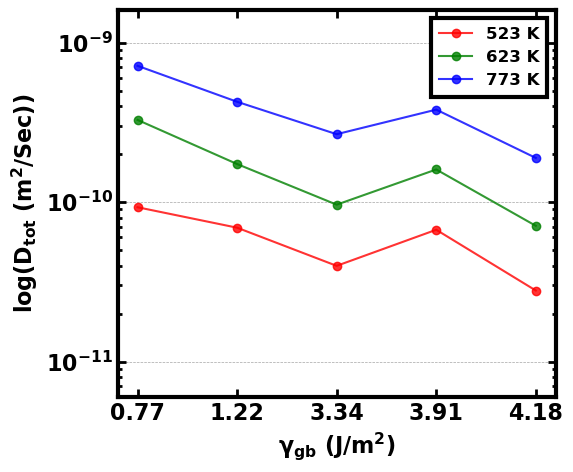

In [ ]:
# Ensure gb_energy and gb_perp_* arrays are numpy arrays and have the correct shape
gb_energy = np.array(gb_energy).flatten()
ex_vv = np.array(ex_vol).flatten()
gb_perp_523 = np.array(diff_523).flatten()
gb_perp_623 = np.array(diff_623).flatten()
gb_perp_773 = np.array(diff_773).flatten()

gb_p_523 = np.array(diff_perp_523).flatten()
gb_p_623 = np.array(diff_perp_623).flatten()
gb_p_773 = np.array(diff_perp_773).flatten()

gb_pa_523 = np.array(diff_par_523).flatten()
gb_pa_623 = np.array(diff_par_623).flatten()
gb_pa_773 = np.array(diff_par_773).flatten()

gb_o_523 = np.array(diff_out_523).flatten()
gb_o_623 = np.array(diff_out_623).flatten()
gb_o_773 = np.array(diff_out_773).flatten()


# Now let's try combining and sorting again
combined_data_523 = np.column_stack((gb_energy,ex_vv, gb_perp_523, gb_p_523, gb_pa_523, gb_o_523))
combined_data_623 = np.column_stack((gb_energy,ex_vv, gb_perp_623, gb_p_623, gb_pa_623, gb_o_623))
combined_data_773 = np.column_stack((gb_energy,ex_vv, gb_perp_773, gb_p_773, gb_pa_773, gb_o_773))

# Sorting the combined data by GB energy
sorted_data_523 = combined_data_523[combined_data_523[:, 0].argsort()]
sorted_data_623 = combined_data_623[combined_data_623[:, 0].argsort()]
sorted_data_773 = combined_data_773[combined_data_773[:, 0].argsort()]

# Sorting bases on excess volume
sorted_data_523_1 = combined_data_523[combined_data_523[:, 1].argsort()]
sorted_data_623_1 = combined_data_623[combined_data_623[:, 1].argsort()]
sorted_data_773_1 = combined_data_773[combined_data_773[:, 1].argsort()]

# Extracting sorted GB energy and diffusion values
sorted_gb_energy_523 = sorted_data_523[:, 0]

sorted_vacation_523 = sorted_data_523[:, 1]
sorted_diffusion_523 = sorted_data_523[:, 2]
sorted_diff_perp_523 = sorted_data_523[:, 3]
sorted_diff_par_523 = sorted_data_523[:, 4]
sorted_diff_out_523 = sorted_data_523[:, 5]

sorted_gb_energy_623 = sorted_data_623[:, 0]
sorted_vacation_623 = sorted_data_523[:, 1]
sorted_diffusion_623 = sorted_data_623[:, 2]
sorted_diff_perp_623 = sorted_data_623[:, 3]
sorted_diff_par_623 = sorted_data_623[:, 4]
sorted_diff_out_623 = sorted_data_623[:, 5]

sorted_gb_energy_773 = sorted_data_773[:, 0]
sorted_vacation_773 = sorted_data_523[:, 1]
sorted_diffusion_773 = sorted_data_773[:, 2]
sorted_diff_perp_773 = sorted_data_773[:, 3]
sorted_diff_par_773 = sorted_data_773[:, 4]
sorted_diff_out_773 = sorted_data_773[:, 5]
# sorted based on excess volume

sorted_gb_energy_523_1 = sorted_data_523_1[:, 0]
sorted_vacation_523_1 = sorted_data_523_1[:, 1]
sorted_diffusion_523_1 = sorted_data_523_1[:, 2]
sorted_diff_perp_523_1 = sorted_data_523_1[:, 3]
sorted_diff_par_523_1 = sorted_data_523_1[:, 4]
sorted_diff_out_523_1 = sorted_data_523_1[:, 5]

sorted_gb_energy_623_1 = sorted_data_623_1[:, 0]
sorted_vacation_623_1 = sorted_data_623_1[:, 1]
sorted_diffusion_623_1 = sorted_data_623_1[:, 2]
sorted_diff_perp_623_1 = sorted_data_623_1[:, 3]
sorted_diff_par_623_1 = sorted_data_623_1[:, 4]
sorted_diff_out_623_1 = sorted_data_623_1[:, 5]

sorted_gb_energy_773_1 = sorted_data_773_1[:, 0]
sorted_vacation_773_1 = sorted_data_773_1[:, 1]
sorted_diffusion_773_1 = sorted_data_773_1[:, 2]
sorted_diff_perp_773_1 = sorted_data_773_1[:, 3]
sorted_diff_par_773_1 = sorted_data_773_1[:, 4]
sorted_diff_out_773_1 = sorted_data_773_1[:, 5]

# Plotting the corrected bar chart
fig, ax = plt.subplots(figsize=(6, 5))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller
ax.tick_params(axis='both',          # Apply to both x and y axes
               which='major',         # Apply to both major and minor ticks
               direction='in',       # Direct ticks inward
               bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
               width=2,              # Tick width for all ticks
               length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart
bar_width = 0.2
opacity = 0.8
# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_gb_energy_523))

# Plotting the bar chart for selected temperatures after sorting
plt.plot(positions, sorted_diffusion_523, 'o-', alpha=opacity, color='r', label='523 K')
plt.plot(positions, sorted_diffusion_623, 'o-', alpha=opacity, color='g', label='623 K')
plt.plot(positions, sorted_diffusion_773, 'o-', alpha=opacity, color='b', label='773 K')


# Adding the x-axis labels
ax.set_xlabel('$\mathbf{\gamma_{gb}}$ $\mathrm{\mathbf{(J/m^2)}}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{tot}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
ax.set_xticklabels(np.round(sorted_gb_energy_523, 2))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.6e-11, 1.6e-09)  # Setting y-axis limits to better visualize the data
ax.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_energy_total.png', dpi=600, bbox_inches='tight')
plt.show()

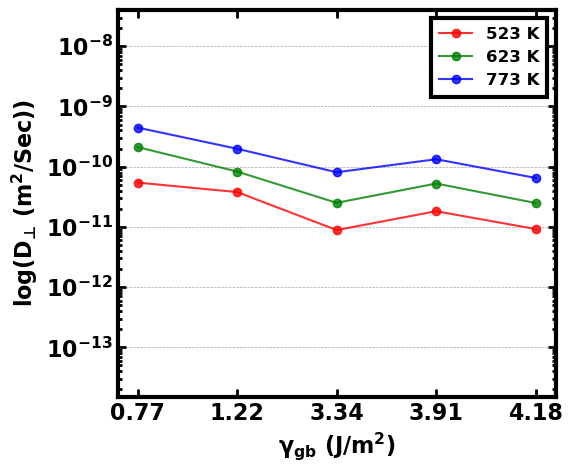

In [ ]:
# plot for perpendicular diffusion

fig, ax = plt.subplots(figsize=(6, 5))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller
ax.tick_params(axis='both',          # Apply to both x and y axes
               which='major',         # Apply to both major and minor ticks
               direction='in',       # Direct ticks inward
               bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
               width=2,              # Tick width for all ticks
               length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart
bar_width = 0.2
opacity = 0.8
# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_gb_energy_523))

# Plotting the bar chart for selected temperatures after sorting
plt.plot(positions, sorted_diff_perp_523, 'o-', alpha=opacity, color='r', label='523 K')
plt.plot(positions, sorted_diff_perp_623, 'o-', alpha=opacity, color='g', label='623 K')
plt.plot(positions, sorted_diff_perp_773, 'o-', alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels
ax.set_xlabel('$\mathbf{\gamma_{gb}}$ $\mathrm{\mathbf{(J/m^2)}}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{⊥}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
ax.set_xticklabels(np.round(sorted_gb_energy_523, 2))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.15e-13, 4e-08)  # Setting y-axis limits to better visualize the data
#ax.set_xlim(0.5, 4.5)
ax.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_energy_perp.png', dpi=600, bbox_inches='tight')
plt.show()



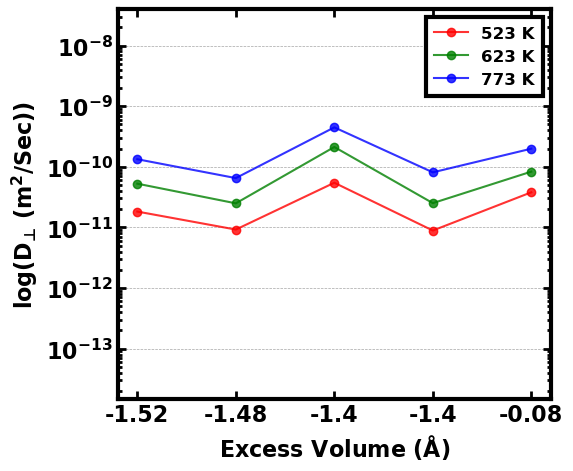

In [ ]:
# plot for perpendicular diffusion

fig, ax = plt.subplots(figsize=(6, 5))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller
ax.tick_params(axis='both',          # Apply to both x and y axes
               which='major',         # Apply to both major and minor ticks
               direction='in',       # Direct ticks inward
               bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
               width=2,              # Tick width for all ticks
               length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart
bar_width = 0.2
opacity = 0.8
# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_vacation_523_1))

# Plotting the bar chart for selected temperatures after sorting
plt.plot(positions, sorted_diff_perp_523_1, 'o-', alpha=opacity, color='r', label='523 K')
plt.plot(positions, sorted_diff_perp_623_1, 'o-', alpha=opacity, color='g', label='623 K')
plt.plot(positions, sorted_diff_perp_773_1, 'o-', alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels
ax.set_xlabel('Excess Volume $\mathrm{(\AA)}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{⊥}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
ax.set_xticklabels(np.round(sorted_vacation_523_1, 2))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.15e-13, 4e-08)  # Setting y-axis limits to better visualize the data
ax.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_volume_perp.png', dpi=600, bbox_inches='tight')
plt.show()

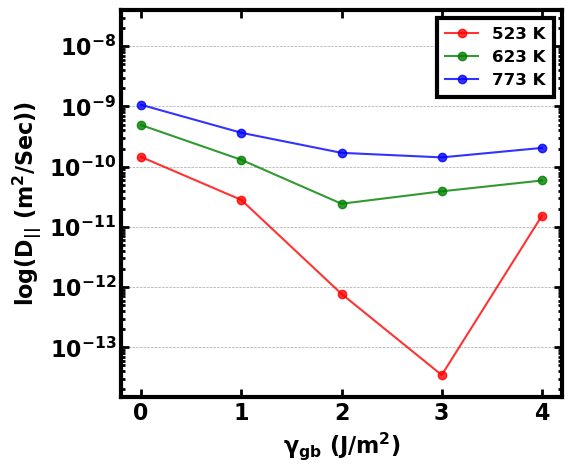

In [ ]:
# parallel 1

fig, ax = plt.subplots(figsize=(6, 5))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='major',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart

bar_width = 0.2

opacity = 0.8

# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_vacation_523))

# Plotting the bar chart for selected temperatures after sorting
plt.plot(positions, sorted_diff_par_523, 'o-', alpha=opacity, color='r', label='523 K')
plt.plot(positions, sorted_diff_par_623, 'o-', alpha=opacity, color='g', label='623 K')
plt.plot(positions, sorted_diff_par_773, 'o-', alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels
ax.set_xlabel('$\mathbf{\gamma_{gb}}$ $\mathrm{\mathbf{(J/m^2)}}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{||}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
#ax.set_xticklabels(np.round(sorted_vacation_523))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.15e-13, 4e-08)  # Setting y-axis limits to better visualize the data

ax.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_energy_par_1.png', dpi=600, bbox_inches='tight')
plt.show()

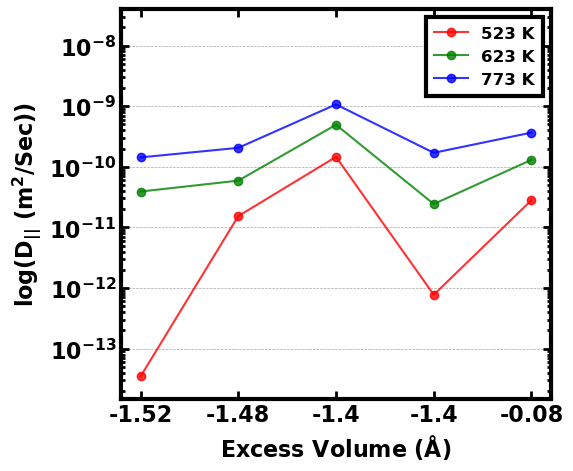

In [ ]:
# parallel 1

fig, ax = plt.subplots(figsize=(6, 5))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='major',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart

bar_width = 0.2

opacity = 0.8

# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_vacation_523_1))

# Plotting the bar chart for selected temperatures after sorting
plt.plot(positions, sorted_diff_par_523_1, 'o-', alpha=opacity, color='r', label='523 K')
plt.plot(positions, sorted_diff_par_623_1, 'o-', alpha=opacity, color='g', label='623 K')
plt.plot(positions, sorted_diff_par_773_1, 'o-', alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels
ax.set_xlabel('Excess Volume $\mathrm{(\AA)}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{||}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
ax.set_xticklabels(np.round(sorted_vacation_523_1, 2))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.15e-13, 4e-08)  # Setting y-axis limits to better visualize the data

ax.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_vol_par_1.png', dpi=600, bbox_inches='tight')
plt.show()

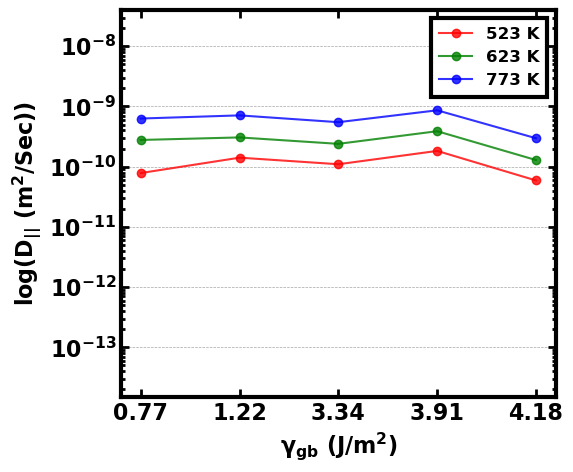

In [ ]:
# parallel 2

fig, ax = plt.subplots(figsize=(6, 5))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='major',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks  

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart

bar_width = 0.2

opacity = 0.8

# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_gb_energy_523))

# Plotting the bar chart for selected temperatures after sorting
plt.plot(positions, sorted_diff_out_523, 'o-', alpha=opacity, color='r', label='523 K')
plt.plot(positions, sorted_diff_out_623, 'o-', alpha=opacity, color='g', label='623 K')
plt.plot(positions, sorted_diff_out_773, 'o-', alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels
ax.set_xlabel('$\mathbf{\gamma_{gb}}$ $\mathrm{\mathbf{(J/m^2)}}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{||}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
ax.set_xticklabels(np.round(sorted_gb_energy_523, 2))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.15e-13, 4e-08)  # Setting y-axis limits to better visualize the data

ax.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_energy_out.png', dpi=600, bbox_inches='tight')
plt.show()


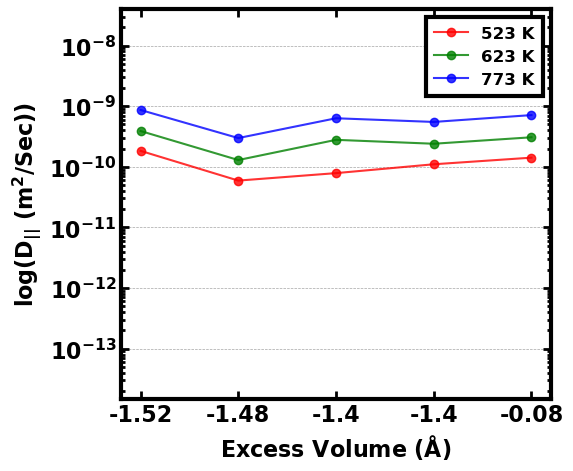

In [ ]:
# parallel 2

fig, ax = plt.subplots(figsize=(6, 5))

# Adjusting tick parameters for both axes to direct ticks inward and make bottom ticks smaller

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='major',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=6)             # Tick length for top, left, and right ticks

ax.tick_params(axis='both',          # Apply to both x and y axes
                which='minor',         # Apply to both major and minor ticks
                direction='in',       # Direct ticks inward
                bottom=True, top=True, left=True, right=True,  # Enable ticks on all sides
                width=2,              # Tick width for all ticks
                length=3)             # Tick length for top, left, and right ticks  

# Adding grid lines for better readability, only to y-axis for log scale visibility
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Calculating the width of each bar to fit the chart

bar_width = 0.2

opacity = 0.8

# Defining new positions for each temperature's bars based on sorted GB energy
positions = np.arange(len(sorted_vacation_523_1))

# Plotting the bar chart for selected temperatures after sorting
plt.plot(positions, sorted_diff_out_523_1, 'o-', alpha=opacity, color='r', label='523 K')
plt.plot(positions, sorted_diff_out_623_1, 'o-', alpha=opacity, color='g', label='623 K')
plt.plot(positions, sorted_diff_out_773_1, 'o-', alpha=opacity, color='b', label='773 K')

# Adding the x-axis labels
ax.set_xlabel('Excess Volume $\mathrm{(\AA)}$')
ax.set_ylabel("$\mathrm{\mathbf{log(D_{||}\ (m^2/Sec))}}$", fontsize=16)
#ax.set_title('Sorted Diffusion Tensor vs GB Energy at Selected Temperatures')
ax.set_xticks(positions)
ax.set_xticklabels(np.round(sorted_vacation_523_1, 2))
ax.set_yscale('log')  # Setting y-axis to log scale due to wide range of values
ax.set_ylim(0.15e-13, 4e-08)  # Setting y-axis limits to better visualize the data

ax.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig('diffusion_gb_vol_out.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# perpendicualr diffusion at 523, 623 and 773 K for all GBs



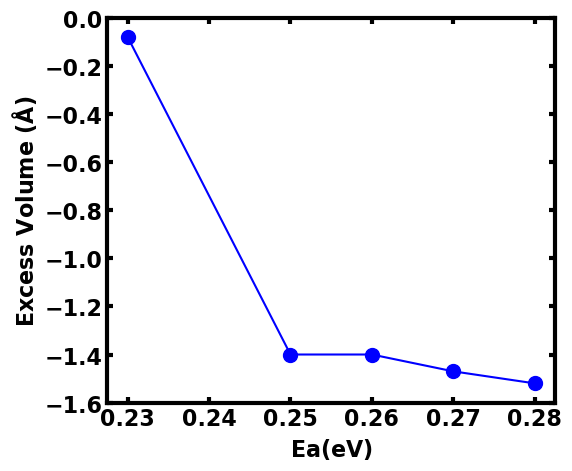

In [ ]:
# plot excess volume vs activation energy

# Extracting sorted GB energy and diffusion values
sorted_ex_vol = [0.23, 0.25, 0.26, 0.27, 0.28]
sorted_act_eng = [-0.08, -1.40, -1.40, -1.47, -1.52]

# Figure size
plt.figure(figsize=(6, 5))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"

#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

# plot ex vol vs act eng
plt.plot(sorted_ex_vol, sorted_act_eng, 'o-', color='b', markersize=10, label='Ea')
plt.ylabel('Excess Volume ($\mathbf{\AA}$)', fontsize=16)
plt.xlabel('$\mathrm{Ea (eV)}$')
plt.ylim(-1.6, 0.0)
#plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('ex_vol_act_eng.png', dpi=600, bbox_inches='tight')
plt.show()
 

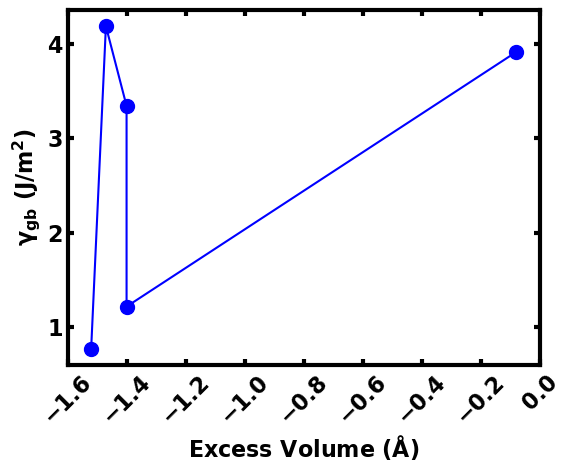

In [ ]:
# plot excess volume vs gb energy

# Extracting sorted GB energy and diffusion values
sorted_act_e = [0.23, 0.25, 0.26, 0.27, 0.28]
sorted_ex_vo = [-0.08, -1.40, -1.40, -1.47, -1.52]
fr_enn = [3.9113570795119355,1.22,3.34,4.1835032415236535,0.77]

# Figure size
plt.figure(figsize=(6, 5))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

# plot ex vol vs act eng
plt.plot(sorted_ex_vo, fr_enn, 'o-', color='b', markersize=10, label='Ea')
plt.ylabel('$\mathrm{\gamma_{gb}}$ ($\mathbf{J/m^2}$)', fontsize=16)
plt.xlabel('Excess Volume ($\mathbf{\AA}$)')
#plt.ylim(0, 5)
# I want limit from -1.6 to 0.0, with 0.2 step
plt.xticks(np.arange(-1.6, 0.1, 0.2), rotation=45)
#plt.xlim(
#plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('ex_vol_gb_energy.png', dpi=600, bbox_inches='tight')
plt.show()



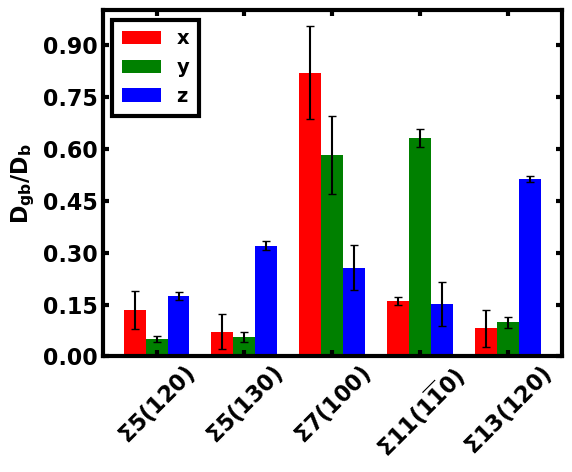

In [ ]:
# plot mean and stabdard deviation in diffusion ration vs gbs for x, y, and z directions
# Adjust the figure size
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)
# Set the width of the bars
barWidth = 0.25

name = ['$\Sigma 5 (120)$', '$\Sigma 5 (130)$', '$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$', '$\Sigma 13 (120)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot

plt.bar(r1, [np.mean(gb_5_1_x_ratio), np.mean(gb_5_2_x_ratio), np.mean(gb_7_1_x_ratio), np.mean(gb_11_1_x_ratio), np.mean(gb_13_1_x_ratio)], color='r', width=barWidth, edgecolor='none', label='x', yerr=[np.std(gb_5_1_x_ratio), np.std(gb_5_2_x_ratio), np.std(gb_7_1_x_ratio), np.std(gb_11_1_x_ratio), np.std(gb_13_1_x_ratio)], capsize=3)
plt.bar(r2, [np.mean(gb_5_1_y_ratio), np.mean(gb_5_2_y_ratio), np.mean(gb_7_1_y_ratio), np.mean(gb_11_1_y_ratio), np.mean(gb_13_1_y_ratio)], color='g', width=barWidth, edgecolor='none', label='y', yerr=[np.std(gb_5_1_y_ratio), np.std(gb_5_2_y_ratio), np.std(gb_7_1_y_ratio), np.std(gb_11_1_y_ratio), np.std(gb_13_1_y_ratio)], capsize=3)
plt.bar(r3, [np.mean(gb_5_1_z_ratio), np.mean(gb_5_2_z_ratio), np.mean(gb_7_1_z_ratio), np.mean(gb_11_1_z_ratio), np.mean(gb_13_1_z_ratio)], color='b', width=barWidth, edgecolor='none', label='z', yerr=[np.std(gb_5_1_z_ratio), np.std(gb_5_2_z_ratio), np.std(gb_7_1_z_ratio), np.std(gb_11_1_z_ratio), np.std(gb_13_1_z_ratio)], capsize=3)

# Add xticks on the middle of the group bars
#plt.xlabel('GB', fontweight='bold')
#plt.grid(True, axis='y', linestyle='--')
# plot y ticks for 2 decimal places
plt.xticks([r + barWidth for r in range(len(name))], name, rotation=45)
plt.ylabel('$\mathrm{D_{gb}/D_{b}}$', fontweight='bold', fontsize=16)
plt.yticks(np.arange(0, 1, 0.15))
#plt.ylim(0, 1.25)
#plt.yticks(np.arange(0, 0.1, 0.05))
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper left',fontsize=14,ncol=1)
plt.savefig('mean_std.png', dpi=600, bbox_inches='tight')
plt.show()





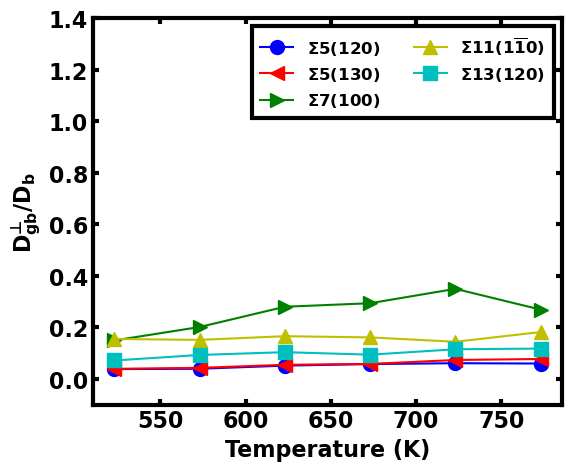

In [ ]:
# We need ration for each temerature for each GB in perpedicular direction

plt.figure(figsize=(6, 5))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


#plt.errorbar(t_1, arr_tot_5_1_b, yerr=0, fmt='o-',markersize='10',elinewidth = 0, color='b', label='Bulk {:0.2f} eV'.format(Ea_tot_5_1_b))
#plt.errorbar(t_1, arr_tot_5_1_gb, yerr=0, fmt='<-',markersize='10',elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_tot_5_1_gb))
#plt.errorbar(t_1, arr_tot_5_2_gb, yerr=0, fmt='>-',markersize='10',elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_tot_5_2_gb))
#plt.errorbar(t_1, arr_tot_7_1_gb, yerr=0, fmt='^-',markersize='10',elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV'.format(Ea_tot_7_1_gb))
#plt.errorbar(t_1, arr_tot_11_1_gb, yerr=0, fmt='s-',markersize='10',elinewidth = 0, color='c', label=label_str)
#plt.errorbar(t_1, arr_tot_13_1_gb, yerr=0, fmt='v-',markersize='10',elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_tot_13_1_gb))
#plt.yscale('log')

# plot ex vol vs act eng
plt.plot(temp, gb_5_1_y_ratio, 'o-', color='b', markersize=10, label='$\Sigma 5 (120)$')
plt.plot(temp, gb_5_2_y_ratio, '<-', color='r', markersize=10, label='$\Sigma 5 (130)$')
plt.plot(temp, gb_7_1_z_ratio, '>-', color='g', markersize=10, label='$\Sigma 7 (100)$')
plt.plot(temp, gb_11_1_x_ratio, '^-', color='y', markersize=10, label='$\Sigma 11 (1\overline{1}0)$')
plt.plot(temp, gb_13_1_y_ratio, 's-', color='c', markersize=10, label='$\Sigma 13 (120)$')
#plt.ylabel('$\mathrm{D^{⊥}_{gb}/D_{b}}$', fontsize=16)

plt.ylabel('$\mathrm{D^{⊥}_{gb}/D_{b}}$', fontsize=16)
plt.xlabel('Temperature (K)')
plt.ylim(-0.1, 1.4)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='best',fontsize=12,ncol=2)
plt.savefig('ratio_perp.png', dpi=600, bbox_inches='tight')
plt.show()



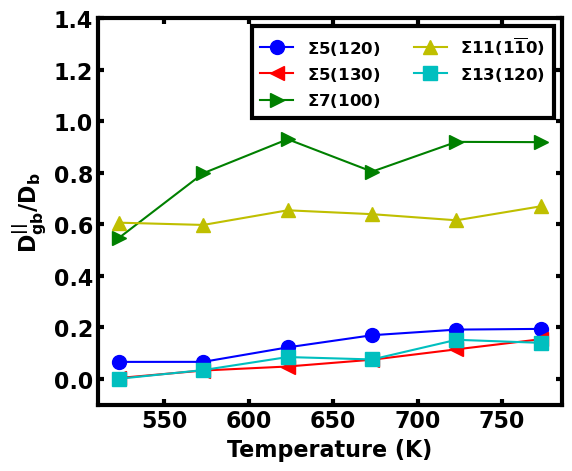

In [ ]:
# parallel direction

plt.figure(figsize=(6, 5))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# plot ex vol vs act eng
plt.plot(temp, gb_5_1_x_ratio, 'o-', color='b', markersize=10, label='$\Sigma 5 (120)$')
plt.plot(temp, gb_5_2_x_ratio, '<-', color='r', markersize=10, label='$\Sigma 5 (130)$')
plt.plot(temp, gb_7_1_x_ratio, '>-', color='g', markersize=10, label='$\Sigma 7 (100)$')
plt.plot(temp, gb_11_1_y_ratio, '^-', color='y', markersize=10, label='$\Sigma 11 (1\overline{1}0)$')
plt.plot(temp, gb_13_1_x_ratio, 's-', color='c', markersize=10, label='$\Sigma 13 (120)$')
plt.ylabel('$\mathrm{D^{||}_{gb}/D_{b}}$', fontsize=16)
plt.xlabel('Temperature (K)')
plt.ylim(-0.1, 1.4)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='best',fontsize=12,ncol=2)
plt.savefig('ratio_parallel_1.png', dpi=600, bbox_inches='tight')
plt.show()


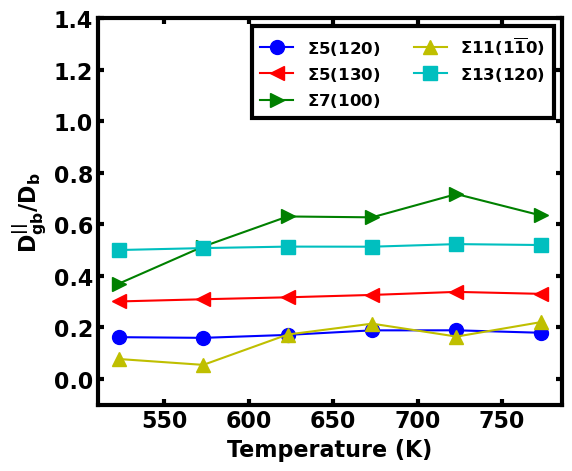

In [ ]:
# parallel direction 2

plt.figure(figsize=(6, 5))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# plot ex vol vs act eng
plt.plot(temp, gb_5_1_z_ratio, 'o-', color='b', markersize=10, label='$\Sigma 5 (120)$')
plt.plot(temp, gb_5_2_z_ratio, '<-', color='r', markersize=10, label='$\Sigma 5 (130)$')
plt.plot(temp, gb_7_1_y_ratio, '>-', color='g', markersize=10, label='$\Sigma 7 (100)$')
plt.plot(temp, gb_11_1_z_ratio, '^-', color='y', markersize=10, label='$\Sigma 11 (1\overline{1}0)$')
plt.plot(temp, gb_13_1_z_ratio, 's-', color='c', markersize=10, label='$\Sigma 13 (120)$')
plt.ylabel('$\mathrm{D^{||}_{gb}/D_{b}}$', fontsize=16)
plt.xlabel('Temperature (K)')
plt.ylim(-0.1, 1.4)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='best',fontsize=12,ncol=2)
plt.savefig('ratio_parallel_2.png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
# plot ratio for parallel avergae for parallel directions 
gb_5_1_avg = [] 
for i, j in zip(gb_5_1_z_ratio, gb_5_1_x_ratio):
    gb_5_1_avg.append((i+j)/2)

gb_5_2_avg = []
for i, j in zip(gb_5_2_z_ratio, gb_5_2_x_ratio):
    gb_5_2_avg.append((i+j)/2)
    
gb_7_1_avg = []
for i, j in zip(gb_7_1_y_ratio, gb_7_1_x_ratio):
    gb_7_1_avg.append((i+j)/2)
    
gb_11_1_avg = []
for i, j in zip(gb_11_1_y_ratio, gb_11_1_z_ratio):
    gb_11_1_avg.append((i+j)/2)
    
gb_13_1_avg = []
for i, j in zip(gb_13_1_z_ratio, gb_13_1_x_ratio):
    gb_13_1_avg.append((i+j)/2)


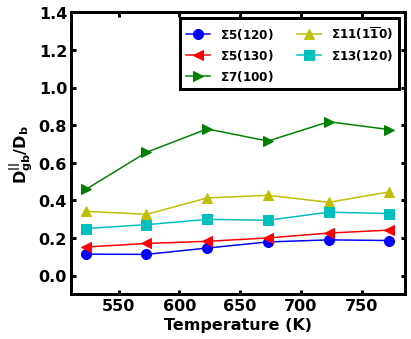

In [ ]:
# parallel direction 2

plt.figure(figsize=(6, 5))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# plot ex vol vs act eng
plt.plot(temp, gb_5_1_avg, 'o-', color='b', markersize=10, label='$\Sigma 5 (120)$')
plt.plot(temp, gb_5_2_avg, '<-', color='r', markersize=10, label='$\Sigma 5 (130)$')
plt.plot(temp, gb_7_1_avg, '>-', color='g', markersize=10, label='$\Sigma 7 (100)$')
plt.plot(temp, gb_11_1_avg, '^-', color='y', markersize=10, label='$\Sigma 11 (1\overline{1}0)$')
plt.plot(temp, gb_13_1_avg, 's-', color='c', markersize=10, label='$\Sigma 13 (120)$')
plt.ylabel('$\mathrm{D^{||}_{gb}/D_{b}}$', fontsize=16)
plt.xlabel('Temperature (K)')
plt.ylim(-0.1, 1.4)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='best',fontsize=12,ncol=2)
plt.savefig('ratio_parallel_avg.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# Plot excess volume vs gb models for 5, 5, 7, 11, 13, scatter plot but names of gb models on x axis

# Adjust the figure size
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])

# Set the width of the bars
barWidth = 0.25
ex_vol = [-1.479, -1.402, -1.522, -1.403, -0.078]
name = ['$\Sigma 5 (120)$', '$\Sigma 5 (130)$', '$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$', '$\Sigma 13 (120)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make scatter plot
plt.plot(name, ex_vol, 'o-', color='b', markersize=10)
#plt.scatter(name, fr_enn, label='GB Energy', color='g', s=100)

plt.ylabel('GB Excess Volume ($\mathbf{\AA}$)', fontsize=16)
#plt.xlabel('GB Model')
plt.xticks(rotation=45)
#plt.ylim(-1.6, 0.0 )
plt.yticks([-1.75,-1.5, -1.25, -1.00, -0.75, -0.50, -0.25, 0.0])
#plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=14,ncol=1)
plt.savefig('ex_vol_gb_models.png', dpi=600, bbox_inches='tight')
plt.show()



<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\S'
<>:37: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1031762/228276481.py:24: SyntaxWarning: invalid escape sequence '\S'
  name = ['$\Sigma 5 (120)$', '$\Sigma 5 (130)$', '$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$', '$\Sigma 13 (120)$']
/tmp/ipykernel_1031762/228276481.py:24: SyntaxWarning: invalid escape sequence '\S'
  name = ['$\Sigma 5 (120)$', '$\Sigma 5 (130)$', '$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0

NameError: name 'plt' is not defined

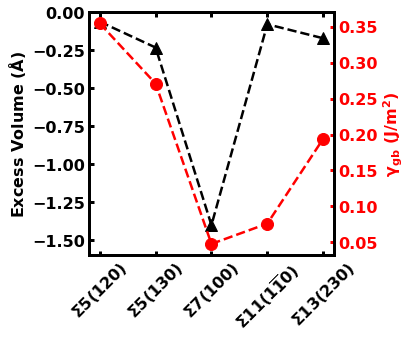

In [30]:
# plot excess volume vs gb energy

# Extracting sorted GB energy and diffusion values
#name = ['$\Sigma 13 (230)$', '$\Sigma 11 (1\overline{1}0)$', '$\Sigma 5 (130)$', '$\Sigma 5 (120)$', '$\Sigma 7 (100)$']
#sorted_ex_vo = [-0.08, -1.40, -1.40, -1.47, -1.52]
#fr_enn = [3.9113570795119355,1.22,3.34,4.1835032415236535,0.77]


name = ['$\Sigma 5 (120)$', '$\Sigma 5 (130)$', '$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$', '$\Sigma 13 (230)$']
#sorted_ex_vo = [-1.47, -1.40, -1.52, -1.40, -0.08]
#fr_enn = [4.1835032415236535,3.34,0.77,1.22,3.9113570795119355]
sorted_ex_vo = [-0.061323308414838844, -0.23204285520550866, -1.40320612634761, -0.07847156056452788, -0.170897776692641]
fr_enn = [0.35449469626656793,0.2708079516223237,0.04792898454852263, 0.07616876048571995,0.1940328114805032]

#sorted_act_e = [0.23, 0.25, 0.26, 0.27, 0.28]
#sorted_ex_vo = [-0.08, -1.40, -1.40, -1.47, -1.52]
#fr_enn = [3.9113570795119355,1.22,3.34,4.1835032415236535,0.77]

positions = np.arange(len(name))

# Figure size
plt.figure(figsize=(6, 5))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

#plt.scatter(positions, sorted_ex_vo, color='red', marker='o', s=150, facecolors='none')
plt.plot(positions, sorted_ex_vo, marker='^', mfc='k', ms=12, ls='--', c='k', lw=2.5)
plt.ylabel('Excess Volume ($\mathbf{\AA}$)', fontsize=16, color='k')
plt.xticks(positions, name, rotation=45)
plt.ylim(-1.6, 0.0)


# I want limit from -1.6 to 0.0, with 0.2 step
#plt.xticks(np.arange(-1.6, 0.1, 0.2), rotation=45)

# second y axis
plt.twinx()
plt.tick_params(which='both', axis="y",direction="in")
plt.rcParams["axes.linewidth"] = 3
plt.tick_params(width=3, length=4.5, colors='r')
# color axis 
# plot ex vol vs act eng
#plt.scatter(positions, fr_enn, color='blue', marker='o', s=150, facecolors='none') #color='blue', marker='o', s=100, facecolors='none'
plt.plot(positions, fr_enn, marker='o', mfc='r', ms=12, ls='--', c='r', lw=2.5)

plt.ylabel('$\mathrm{\gamma_{gb}}$ ($\mathbf{J/m^2}$)', fontsize=16, color='r')
#plt.xlabel('Excess Volume ($\mathbf{\AA}$)')
plt.xticks(positions, name, rotation=45)
#plt.ylim(-0.5, 5)

#plt.xlim(
#plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
plt.savefig('ex_vol_gb_energy_1.png', dpi=600, bbox_inches='tight')
plt.show()